<hr style="border:1px solid #FFD700; margin-top:20px; margin-bottom:20px;">

<h1 style="color:#FF0000; text-transform:uppercase;
           font-family:'Times New Roman', Times, serif;
           text-align:center; font-size:28px;
           margin-top:10px; margin-bottom:10px;">
  <b>TRAITEMENT ET PRÉPARATION DES DONNÉES</b>
</h1>

<hr style="border:1px solid #FFD700; margin-top:20px; margin-bottom:30px;">


<div style="text-align:center;">
  <h2 style="color:white; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px; line-height:1.4;
             max-width:90%; white-space:normal; word-wrap:break-word;">
    <b>Étape 1 : Analyse structurelle du jeu de données</b>
  </h2>
</div>


In [1]:
# --- Importation des bibliothèques principales ---
import pandas as pd            # Manipulation et analyse de données
import numpy as np             # Calculs numériques et statistiques
import matplotlib.pyplot as plt # Visualisation de base
import seaborn as sns          # Visualisation statistique avancée
from scipy import stats        # Fonctions statistiques utiles

In [2]:
# Chargement du dataset
data_path = "Actuar.csv"
# Lecture du fichier CSV dans un DataFrame pandas
df = pd.read_csv(data_path, encoding='utf-8', sep=None, engine='python')

In [3]:
# Aperçu des premières lignes
df.head()

,exposition,zone,puissance,agevehicule,ageconducteur,bonus,marque,carburant,densite,region,nbre,garantie,cout
0,0.74,A,5,4,31,64,3,D,21,8,1,1RC,0.00
1,0.18,B,7,8,22,100,2,E,26,0,1,1RC,0.00
2,0.48,C,9,0,32,61,12,E,41,13,1,4BG,687.82
3,0.27,F,7,5,39,100,12,E,11,0,1,2DO,96.64
4,0.51,E,4,0,49,50,12,E,31,13,1,2DO,70.88


In [4]:
# Aperçu des premières lignes
df.tail()

,exposition,zone,puissance,agevehicule,ageconducteur,bonus,marque,carburant,densite,region,nbre,garantie,cout
2760,0.24,B,7,8,31,54,1,E,52,11,1,4BG,156.23
2761,0.91,C,5,4,32,57,1,D,24,10,1,1RC,74.15
2762,0.16,A,5,17,44,50,2,E,24,13,1,4BG,325.57
2763,0.07,C,5,7,48,50,4,D,24,13,1,4BG,387.04
2764,1.00,A,6,4,45,50,1,D,24,13,1,4BG,231.20


In [5]:
# Affiche la liste complète des noms de colonnes
df.columns

Index(['exposition', 'zone', 'puissance', 'agevehicule', 'ageconducteur',
       'bonus', 'marque', 'carburant', 'densite', 'region', 'nbre', 'garantie',
       'cout'],
      dtype='object')

In [6]:
# Dimensions du jeu de données
print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])

Nombre de lignes : 2765
Nombre de colonnes : 13


In [7]:
# Affiche les informations générales sur le DataFrame :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   exposition     2765 non-null   float64
 1   zone           2765 non-null   object 
 2   puissance      2765 non-null   int64  
 3   agevehicule    2765 non-null   int64  
 4   ageconducteur  2765 non-null   int64  
 5   bonus          2765 non-null   int64  
 6   marque         2765 non-null   int64  
 7   carburant      2765 non-null   object 
 8   densite        2765 non-null   int64  
 9   region         2765 non-null   int64  
 10  nbre           2765 non-null   int64  
 11  garantie       2765 non-null   object 
 12  cout           2765 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 280.9+ KB


<div style="text-align:center;">
  <h2 style="color:white; font-family:'Times New Roman', Times, serif; border-bottom:2px solid #FFD700; display:inline-block; margin-top:20px; margin-bottom:8px; text-align:center; max-width:90%; line-height:1.4; white-space:normal; word-wrap:break-word;">
    <b>Étape 2 : Détection des anomalies, vérifications techniques, métier et normatives</b>
  </h2>
</div>


<div style="text-align:center;">
  <h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif; margin-top:14px; margin-bottom:6px; text-align:center; max-width:90%; line-height:1.4; white-space:normal; word-wrap:break-word;">
    <b>A. Détection « technique / pandas »</b>
  </h3>
</div>


In [10]:
print("=== A. Vérifications TECHNIQUES ===")

# A1. Doublons
dup_mask = df.duplicated(keep=False)
print("A1) Lignes dupliquées :", dup_mask.sum())
dup_preview = df[dup_mask].head(10)  # aperçu

# A2. Valeurs manquantes
missing = df.isna().sum().to_frame("manquants")
missing["taux_%"] = (100*missing["manquants"]/len(df)).round(2)
print("\nA2) Manquants (top 10) :")
print(missing.sort_values("manquants", ascending=False).head(10))

# A3. Types actuels
print("\nA3) Types pandas :")
print(df.dtypes)

# A4. Colonnes object qui semblent contenir des nombres
obj_num_like = {}
for c in df.select_dtypes(include="object").columns:
    s = df[c].str.replace(",", ".").str.replace(" ", "")
    obj_num_like[c] = pd.to_numeric(s, errors="coerce").notna().mean()
obj_num_like = pd.Series(obj_num_like, name="ratio_numerique").sort_values(ascending=False)
print("\nA4) Objects ressemblant à du numérique :")
print(obj_num_like)

# A5. Variantes d’écriture (casse/espaces) pour colonnes textuelles/catégorielles
standard_issues = {}
for c in df.select_dtypes(include=["object","category"]).columns:
    standard_issues[c] = (df[c].astype(str).str.strip().str.lower()).value_counts().head(10)

print("\nA5) Variantes (aperçus disponibles dans 'standard_issues' dict)")


=== A. Vérifications TECHNIQUES ===
A1) Lignes dupliquées : 18

A2) Manquants (top 10) :
               manquants  taux_%
exposition             0     0.0
zone                   0     0.0
puissance              0     0.0
agevehicule            0     0.0
ageconducteur          0     0.0
bonus                  0     0.0
marque                 0     0.0
carburant              0     0.0
densite                0     0.0
region                 0     0.0

A3) Types pandas :
exposition        float64
zone             category
puissance           int64
agevehicule         int64
ageconducteur       int64
bonus               int64
marque           category
carburant        category
densite             int64
region           category
nbre                int64
garantie         category
cout              float64
dtype: object

A4) Objects ressemblant à du numérique :
Series([], Name: ratio_numerique, dtype: object)

A5) Variantes (aperçus disponibles dans 'standard_issues' dict)


<div style="text-align:center;">
  <h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif; text-align:center; margin-top:14px; margin-bottom:6px; max-width:90%; line-height:1.4; white-space:normal; word-wrap:break-word;">
    <b>B. Détection « métier / actuarielle »</b>
  </h3>
</div>


In [11]:
print("\n=== B. Vérifications METIER / ACTUARIELLES ===")

bounds = {
    "ageconducteur": (18, 99),
    "agevehicule": (0, 30),
    "exposition":   (0, 1),      # (0,1] : 1 = 12 mois
    "bonus":        (50, 350),   # grille usuelle bonus-malus
    "puissance":    (4, 15),
    "densite":      (10, 100),
    "nbre":         (0, np.inf),
    "cout":         (0, np.inf),
}

violations = {}
for col, (lo, hi) in bounds.items():
    if col in df.columns:
        bad = df[(df[col] < lo) | (df[col] > hi)]
        violations[col] = bad
        print(f"B1) {col}: {len(bad)} hors bornes")

# Cohérence sinistre/coût
viol_zero_claim_nonzero_cost = df[(df["nbre"] == 0) & (df["cout"] > 0)]
viol_positive_claim_zero_cost = df[(df["nbre"] > 0) & (df["cout"] == 0)]
print("B2) nbre=0 & cout>0 :", len(viol_zero_claim_nonzero_cost))
print("B2) nbre>0 & cout=0 :", len(viol_positive_claim_zero_cost))

# Fréquence > 1
freq = df["nbre"] / df["exposition"]
viol_freq = df[freq > 1]
print("B3) Fréquence (nbre/exposition) > 1 :", len(viol_freq))



=== B. Vérifications METIER / ACTUARIELLES ===
B1) ageconducteur: 0 hors bornes
B1) agevehicule: 2 hors bornes
B1) exposition: 6 hors bornes
B1) bonus: 0 hors bornes
B1) puissance: 0 hors bornes
B1) densite: 0 hors bornes
B1) nbre: 0 hors bornes
B1) cout: 16 hors bornes
B2) nbre=0 & cout>0 : 0
B2) nbre>0 & cout=0 : 282
B3) Fréquence (nbre/exposition) > 1 : 2179


<div style="text-align:center;">
  <h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif; text-align:center; margin-top:14px; margin-bottom:6px; max-width:90%; line-height:1.4; white-space:normal; word-wrap:break-word;">
    <b>C. Détection « normative / gouvernance »</b>
  </h3>
</div>


In [12]:
print("\n=== C. Vérifications NORMATIVES / GOUVERNANCE ===")

# C1. Outliers (IQR 1.5) sur variables continues clés
def iqr_mask(s, k=1.5):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return (s < q1 - k*iqr) | (s > q3 + k*iqr)

out_cout = iqr_mask(df["cout"]) if "cout" in df.columns else pd.Series(False, index=df.index)
out_expo = iqr_mask(df["exposition"]) if "exposition" in df.columns else pd.Series(False, index=df.index)

print("C1) Outliers cout :", int(out_cout.sum()))
print("C1) Outliers exposition :", int(out_expo.sum()))

# C2. Colonnes potentiellement sensibles (PII)
pii_like_cols = [c for c in df.columns
                 if any(k in c.lower() for k in
                        ["nom","prenom","tel","phone","email","adresse","id","cni","nni","nif","passport"])]
print("C2) Colonnes sensibles potentielles :", pii_like_cols if pii_like_cols else "aucune (OK)")

# C3. Empreinte de données (traçabilité)
import hashlib
data_hash = hashlib.md5(pd.util.hash_pandas_object(df, index=True).values).hexdigest()
print("C3) Empreinte/hash du dataset :", data_hash)

# Aperçus si besoin
outliers_cout_preview = df[out_cout].head(10)
outliers_expo_preview = df[out_expo].head(10)



=== C. Vérifications NORMATIVES / GOUVERNANCE ===
C1) Outliers cout : 210
C1) Outliers exposition : 0
C2) Colonnes sensibles potentielles : aucune (OK)
C3) Empreinte/hash du dataset : 73b7dc4de11e89d28aecb5a620fb3dfb


<div style="text-align:center;">
  <h2 style="color:white; font-family:'Times New Roman', Times, serif; border-bottom:2px solid #FFD700; display:inline-block; margin-top:20px; margin-bottom:8px; text-align:center; max-width:90%; line-height:1.4; white-space:normal; word-wrap:break-word;">
    <b>Étape 3 : Traitement et gestion des anomalies constatées</b>
  </h2>
</div>


<div style="text-align:center;">
  <h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif; text-align:center; margin-top:14px; margin-bottom:6px; max-width:90%; line-height:1.4; white-space:normal; word-wrap:break-word;">
    <b>A. Traitements « techniques / pandas »</b>
  </h3>
</div>


<ul style="font-family:'Times New Roman', Times, serif; font-size:18px; line-height:1.7;
           list-style-type:'❖ '; color:#FFD700; margin-top:12px; margin-bottom:16px;
           padding-left:50px;">
  <li style="margin-bottom:10px;">
    <span style="color:white;">Doublons</span> — Identification et suppression des lignes identiques via
    <b>pandas.DataFrame.duplicated()</b> et <b>drop_duplicates()</b>.
  </li>

  <li style="margin-bottom:10px;">
    <span style="color:white;">Valeurs manquantes</span> — Imputation par moyenne, médiane ou interpolation
    selon la nature des variables (<b>fillna()</b>, <b>interpolate()</b>).
  </li>

  <li style="margin-bottom:10px;">
    <span style="color:white;">Formats</span> — Harmonisation des chaînes, types et formats de date
    (<b>astype()</b>, <b>to_datetime()</b>).
  </li>

  <li>
    <span style="color:white;">Standardisation</span> — Normalisation statistique des variables continues
    (Z-score, Min–Max, RobustScaler) pour homogénéiser les échelles avant modélisation.
  </li>
</ul>

In [13]:
# ======================================================
# PHASE 1 — TRAITEMENTS TECHNIQUES (PANDAS)
# Objectif : s'assurer que le jeu de données est propre,
# cohérent et exploitable pour les étapes métier.
# ======================================================

import pandas as pd
import numpy as np

# 0️⃣ Copie de sécurité (préserver l'original)
df_t1 = df.copy()

# 1️⃣ Suppression des doublons
n_dup = df_t1.duplicated().sum()
df_t1 = df_t1.drop_duplicates()

# 2️⃣ Normalisation des colonnes textuelles
text_cols = ['zone', 'carburant', 'garantie']
for c in text_cols:
    if c in df_t1.columns:
        df_t1[c] = (df_t1[c]
                    .astype(str)                             # Convertit en texte
                    .str.strip()                             # Supprime espaces début/fin
                    .str.replace(r"\s+", " ", regex=True)    # Supprime espaces multiples
                    .str.title())                            # Met une majuscule au début

# 3️⃣ Conversion en catégories
cat_cols = ['zone', 'marque', 'carburant', 'region', 'garantie']
for c in cat_cols:
    if c in df_t1.columns:
        df_t1[c] = df_t1[c].astype('category')

# 4️⃣ Conversion sécurisée des colonnes numériques
num_cols_expected = ['exposition','puissance','agevehicule','ageconducteur',
                     'bonus','densite','nbre','cout']
for c in num_cols_expected:
    if c in df_t1.columns and df_t1[c].dtype == 'object':
        df_t1[c] = (df_t1[c].str.replace(",", ".").str.replace(" ", ""))
        df_t1[c] = pd.to_numeric(df_t1[c], errors='coerce')

# 5️⃣ Suppression des colonnes inutiles (s'il y en a)
cols_to_drop = [c for c in df_t1.columns if c.lower() in {'commentaire','transaction_id','id'}]
df_t1 = df_t1.drop(columns=cols_to_drop, errors='ignore')

# 6️⃣ Contrôles rapides post-traitement
print("🔁 Doublons supprimés :", n_dup)
print("🧱 Types après traitement :")
print(df_t1.dtypes)

print("\n🎯 Aperçu des catégories (top 5 modalités) :")
for c in cat_cols:
    if c in df_t1.columns:
        print(f"- {c} :", df_t1[c].value_counts().head(5).to_dict())


🔁 Doublons supprimés : 9
🧱 Types après traitement :
exposition        float64
zone             category
puissance           int64
agevehicule         int64
ageconducteur       int64
bonus               int64
marque           category
carburant        category
densite             int64
region           category
nbre                int64
garantie         category
cout              float64
dtype: object

🎯 Aperçu des catégories (top 5 modalités) :
- zone : {'C': 759, 'D': 617, 'E': 564, 'A': 442, 'B': 299}
- marque : {2: 754, 1: 682, 12: 374, 3: 288, 5: 188}
- carburant : {'D': 1428, 'E': 1328}
- region : {13: 1680, 5: 113, 4: 102, 7: 99, 6: 88}
- garantie : {'1Rc': 980, '2Do': 818, '4Bg': 759, '3Vi': 187, '5Co': 9}


In [14]:
# ======================================================
# 7️Vérifications globales supplémentaires (étape de validation)
# ------------------------------------------------------
# Objectif : s'assurer que df_t1 est propre, bien typé,
# sans valeurs manquantes ni anomalies structurelles.
# ======================================================

print("\n📘 Vérification complète du DataFrame :")
print("------------------------------------------------")

# 1️⃣ Structure générale
print("📊 Structure du DataFrame :")
df_t1.info()

# 2️⃣ Aperçu visuel
print("\n👀 Aperçu des premières lignes :")
print(df_t1.head())

# 3️⃣ Statistiques descriptives séparées par type de variable
print("\n📈 Statistiques descriptives - Variables numériques :")
num_stats = df_t1.describe()
print(num_stats)

print("\n🏷️ Statistiques descriptives - Variables catégorielles :")
cat_stats = df_t1.describe(include=['category'])
print(cat_stats)

# 4️⃣ Vérifications complémentaires rapides
print("\n🧮 Vérifications complémentaires :")
print("- Lignes totales :", len(df_t1))
print("- Valeurs manquantes par colonne :\n", df_t1.isna().sum())
print("- Colonnes numériques :", df_t1.select_dtypes(include=[np.number]).columns.tolist())
print("- Colonnes catégorielles :", df_t1.select_dtypes(include=['category']).columns.tolist())



📘 Vérification complète du DataFrame :
------------------------------------------------
📊 Structure du DataFrame :
<class 'pandas.core.frame.DataFrame'>
Index: 2756 entries, 0 to 2764
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   exposition     2756 non-null   float64 
 1   zone           2756 non-null   category
 2   puissance      2756 non-null   int64   
 3   agevehicule    2756 non-null   int64   
 4   ageconducteur  2756 non-null   int64   
 5   bonus          2756 non-null   int64   
 6   marque         2756 non-null   category
 7   carburant      2756 non-null   category
 8   densite        2756 non-null   int64   
 9   region         2756 non-null   category
 10  nbre           2756 non-null   int64   
 11  garantie       2756 non-null   category
 12  cout           2756 non-null   float64 
dtypes: category(5), float64(2), int64(6)
memory usage: 208.8 KB

👀 Aperçu des premières lignes :
   exposi

<div style="text-align:center;">
  <h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif; text-align:center; margin-top:14px; margin-bottom:6px; max-width:90%; line-height:1.4; white-space:normal; word-wrap:break-word;">
    <b>B. Traitements « métier / actuariels »</b>
  </h3>
</div>

<ul style="font-family:'Times New Roman', Times, serif; font-size:18px; line-height:1.7;
           list-style-type:'❖ '; color:#FFD700; margin-top:12px; margin-bottom:20px;
           padding-left:50px;">
  <li style="margin-bottom:12px;">
    <span style="color:white;">Bornes de plausibilité :</span> Application de <b>règles terrain</b> 
    pour encadrer les valeurs acceptables selon les bornes usuelles des variables métier.
  </li>
</ul>


In [15]:
# ======================================================
# PHASE 2 — TRAITEMENTS METIER / ACTUARIELS (SOFT)
# Seules colonnes ajoutées : frequence, severite, prime_pure
# Aucune autre colonne permanente (pas de flag_*, pas d'intermédiaires)
# ======================================================

import numpy as np
df_t2 = df_t1.copy()  # base propre issue de la Phase 1

# 1) SUPPRESSIONS MINIMALES (vraies absurdités)
#    - exposition <= 0, coût négatif, nombre de sinistres négatif
mask_absurde = (df_t2["exposition"] <= 0) | (df_t2["cout"] < 0) | (df_t2["nbre"] < 0)
df_t2 = df_t2.loc[~mask_absurde].copy()

# 2) RÉPARATIONS COHÉRENCE SINISTRE/COÛT (sans colonne intermédiaire)
# 2a) nbre > 0 & cout == 0 → imputer un coût via sévérité médiane segmentée
#     (segment simple : garantie x carburant)
if "garantie" in df_t2.columns and "carburant" in df_t2.columns:
    tmp = df_t2.loc[df_t2["nbre"] > 0, ["garantie","carburant","cout","nbre"]].copy()
    tmp["sev"] = tmp["cout"] / tmp["nbre"]
    med_sev = tmp.groupby(["garantie","carburant"])["sev"].median()

    m_impute = (df_t2["nbre"] > 0) & (df_t2["cout"] == 0)
    # on essaie d'imputer par la sévérité médiane du segment ; sinon on laisse NaN (rare)
    def _impute_row(row):
        if m_impute.loc[row.name]:
            key = (row["garantie"], row["carburant"])
            val = med_sev.get(key, np.nan)  # lookup sans créer de colonne
            return (val * row["nbre"]) if np.isfinite(val) else np.nan
        return row["cout"]
    df_t2.loc[m_impute, "cout"] = df_t2.loc[m_impute].apply(_impute_row, axis=1)

# 2b) nbre == 0 & cout > 0 → politique choisie : fixer nbre=1 (coût > 0 ⇒ au moins 1 sinistre)
m_fix_nbre = (df_t2["nbre"] == 0) & (df_t2["cout"] > 0)
df_t2.loc[m_fix_nbre, "nbre"] = 1

# 3) BORNES "SOFT" PAR CLIPPING (sans créer de colonnes de flag)
bounds = {
    "ageconducteur": (18, 99),
    "agevehicule":   (0, 30),
    "exposition":    (0.05, 1.0),  # évite expos trop proches de 0 (stabilité des ratios)
    "bonus":         (50, 350),
    "puissance":     (4, 15),
    "densite":       (10, 100)
}
for c,(lo,hi) in bounds.items():
    if c in df_t2.columns:
        df_t2[c] = np.clip(df_t2[c], lo, hi)

# 4) KPI ACTUARIELS (seules nouvelles colonnes demandées)
#    frequence = nbre / exposition
#    severite  = cout / nbre (NaN si nbre=0)
#    prime_pure = cout / exposition
df_t2["frequence"]  = df_t2["nbre"] / df_t2["exposition"]
df_t2["severite"]   = np.where(df_t2["nbre"] > 0, df_t2["cout"]/df_t2["nbre"], np.nan)
df_t2["prime_pure"] = df_t2["cout"] / df_t2["exposition"]

# 5) (OPTIONNEL) GARDE-FOUS : vérifier qu'aucune autre colonne n'a été créée
orig_cols = set(df_t1.columns)
new_cols  = [c for c in df_t2.columns if c not in orig_cols]
print("🧾 Nouvelles colonnes réellement ajoutées :", new_cols)
assert set(new_cols) == {"frequence","severite","prime_pure"}, \
       f"Colonnes en trop : {set(new_cols)-{'frequence','severite','prime_pure'}}"


C:\Users\hp\AppData\Local\Temp\ipykernel_5648\249797010.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_sev = tmp.groupby(["garantie","carburant"])["sev"].median()


🧾 Nouvelles colonnes réellement ajoutées : ['frequence', 'severite', 'prime_pure']


In [16]:
# ======================================================
# VÉRIFICATIONS APRÈS TRAITEMENTS MÉTIER / ACTUARIELS
# ======================================================

print("\n📘 Vérification post-traitement (Phase 2) :")
print("------------------------------------------------")

# 1️⃣ Structure générale
df_t2.info()

# 2️⃣ Aperçu rapide
print("\n👀 Aperçu des données propres (5 premières lignes) :")
print(df_t2.head())

# 3️⃣ Vérification des indicateurs
print("\n📈 Résumé des variables clés :")
print(df_t2[['exposition','nbre','cout','frequence','severite','prime_pure']].describe())

# 4️⃣ Vérification logique
print("\n🧩 Vérification de cohérence logique :")
print("- Fréquence max :", df_t2['frequence'].max())
print("- Sévérité moyenne :", round(df_t2['severite'].mean(), 2))
print("- Prime pure moyenne :", round(df_t2['prime_pure'].mean(), 2))



📘 Vérification post-traitement (Phase 2) :
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2740 entries, 0 to 2764
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   exposition     2740 non-null   float64 
 1   zone           2740 non-null   category
 2   puissance      2740 non-null   int64   
 3   agevehicule    2740 non-null   int64   
 4   ageconducteur  2740 non-null   int64   
 5   bonus          2740 non-null   int64   
 6   marque         2740 non-null   category
 7   carburant      2740 non-null   category
 8   densite        2740 non-null   int64   
 9   region         2740 non-null   category
 10  nbre           2740 non-null   int64   
 11  garantie       2740 non-null   category
 12  cout           2740 non-null   float64 
 13  frequence      2740 non-null   float64 
 14  severite       2740 non-null   float64 
 15  prime_pure     2740 non-null   floa

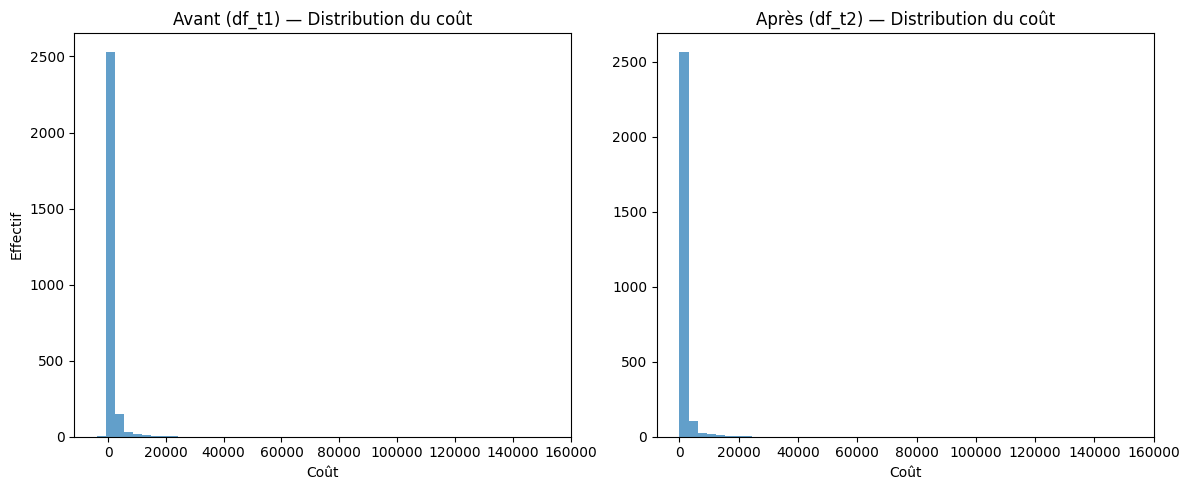

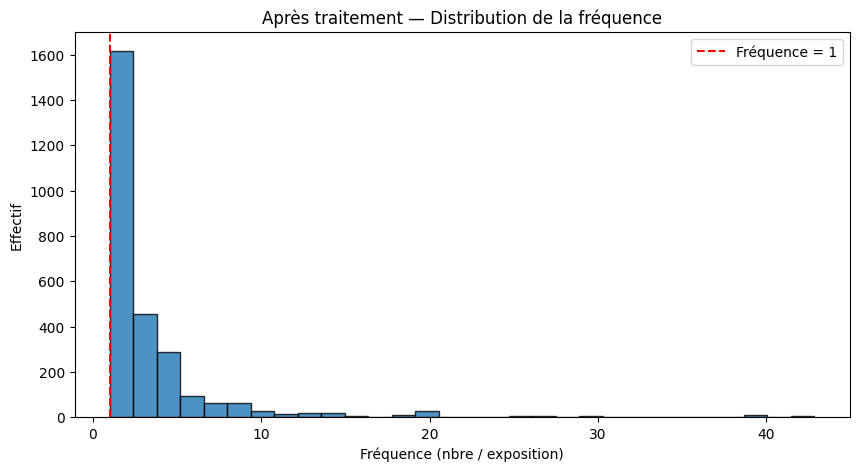

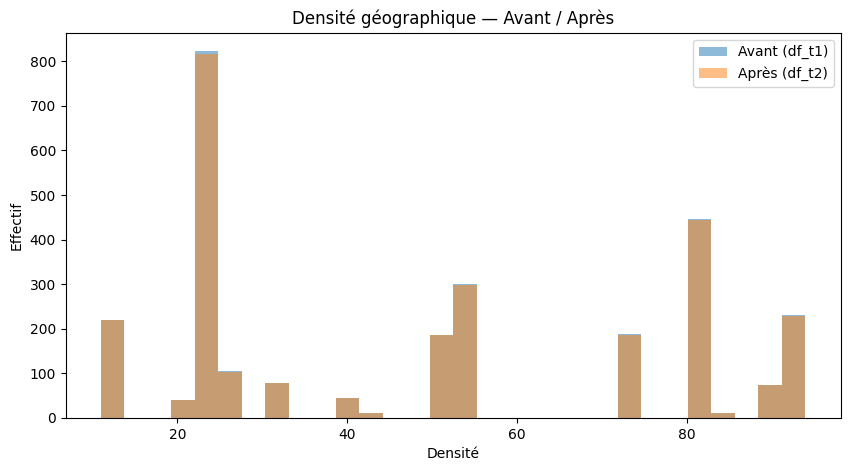

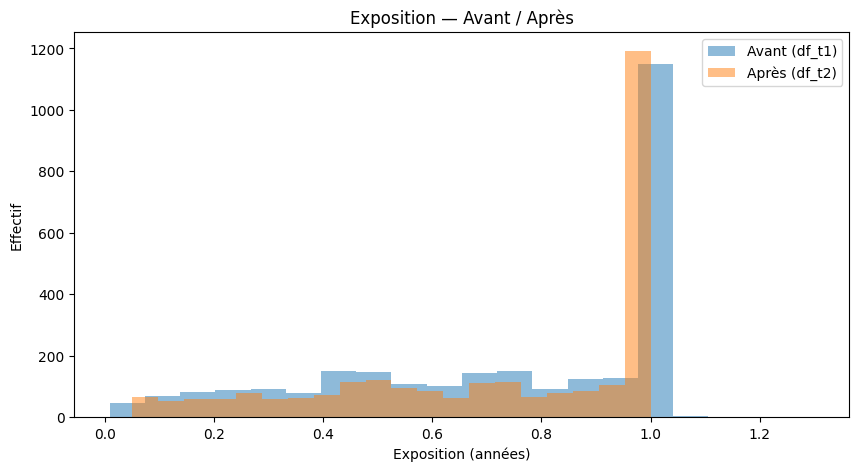

                    cout    densite  exposition
Avant (moy)  1071.550893  49.113933    0.737009
Après (moy)  1139.388357  49.075912    0.737073
Avant (std)  3695.840249  27.852634    0.298264
Après (std)  3692.571240  27.840063    0.297456
Δ_moy (%)       6.330000  -0.080000    0.010000
Δ_std (%)      -0.090000  -0.050000   -0.270000


In [17]:
# ======================================================
# 📊 VISUALISATION & TABLEAU — AVANT vs APRÈS (Phase 2)
# ------------------------------------------------------
# Objectif : vérifier visuellement l'impact du traitement métier
# (df_t1 = avant ; df_t2 = après)
# ======================================================

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1) Histogrammes comparatifs — COUT
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df_t1["cout"], bins=50, alpha=0.7)
plt.title("Avant (df_t1) — Distribution du coût")
plt.xlabel("Coût")
plt.ylabel("Effectif")

plt.subplot(1,2,2)
plt.hist(df_t2["cout"], bins=50, alpha=0.7)
plt.title("Après (df_t2) — Distribution du coût")
plt.xlabel("Coût")
plt.tight_layout()
plt.show()

# 2) Distribution — FREQUENCE (après)
plt.figure(figsize=(10,5))
plt.hist(df_t2["frequence"], bins=30, edgecolor="black", alpha=0.8)
plt.title("Après traitement — Distribution de la fréquence")
plt.xlabel("Fréquence (nbre / exposition)")
plt.ylabel("Effectif")
plt.axvline(1, color="red", linestyle="--", label="Fréquence = 1")
plt.legend()
plt.show()

# 3) Histogrammes superposés — DENSITE (avant vs après)
plt.figure(figsize=(10,5))
plt.hist(df_t1["densite"], bins=30, alpha=0.5, label="Avant (df_t1)")
plt.hist(df_t2["densite"], bins=30, alpha=0.5, label="Après (df_t2)")
plt.title("Densité géographique — Avant / Après")
plt.xlabel("Densité")
plt.ylabel("Effectif")
plt.legend()
plt.show()

# 4) Histogrammes superposés — EXPOSITION (avant vs après)
plt.figure(figsize=(10,5))
plt.hist(df_t1["exposition"], bins=20, alpha=0.5, label="Avant (df_t1)")
plt.hist(df_t2["exposition"], bins=20, alpha=0.5, label="Après (df_t2)")
plt.title("Exposition — Avant / Après")
plt.xlabel("Exposition (années)")
plt.ylabel("Effectif")
plt.legend()
plt.show()

# 5) Tableau comparatif automatique — Moyenne / Std / Delta (%)
def _resume_diff(col):
    mean_before = df_t1[col].mean()
    mean_after  = df_t2[col].mean()
    std_before  = df_t1[col].std()
    std_after   = df_t2[col].std()
    
    return pd.Series({
        "Avant (moy)": mean_before,
        "Après (moy)": mean_after,
        "Avant (std)": std_before,
        "Après (std)": std_after,
        "Δ_moy (%)": round(100*(mean_after - mean_before)/mean_before, 2) if mean_before != 0 else np.nan,
        "Δ_std (%)": round(100*(std_after - std_before)/std_before, 2) if std_before != 0 else np.nan
    })

cols_check = ["cout", "densite", "exposition"]
comparatif = pd.concat({c: _resume_diff(c) for c in cols_check}, axis=1)
print(comparatif)


# 🔎 Rappel d’interprétation :
# - Delta (%) entre -5% et +5% : impact faible → nettoyage neutre (souhaité)
# - Delta (%) > ±20% : impact fort → re-vérifier la règle concernée (clipping, imputation, etc.)


<ul style="font-family:'Times New Roman', Times, serif; font-size:18px; line-height:1.7;
           list-style-type:'❖ '; color:#FFD700; margin-top:12px; margin-bottom:20px;
           padding-left:50px;">
  <li style="margin-bottom:12px;">
    <span style="color:white;">Cohérences structurantes :</span> Vérification des équilibres 
    internes (ex. conformité <b>IFRS&nbsp;17</b>, logique sinistre/coût, équilibre prime-sinistre).
  </li>
</ul>



⚠️ Lignes incohérentes sinistre/coût détectées : 1
✅ Cohérence sinistre/coût corrigée selon IFRS 17
📊 Écart moyen (prime_pure − freq×sev) : 0.0
✅ Équilibre parfait entre fréquence, sévérité et prime pure
🚨 Contrats avec nbre=0 mais frequence≠0 : 0
🚨 Contrats avec nbre=0 mais prime_pure≠0 : 0


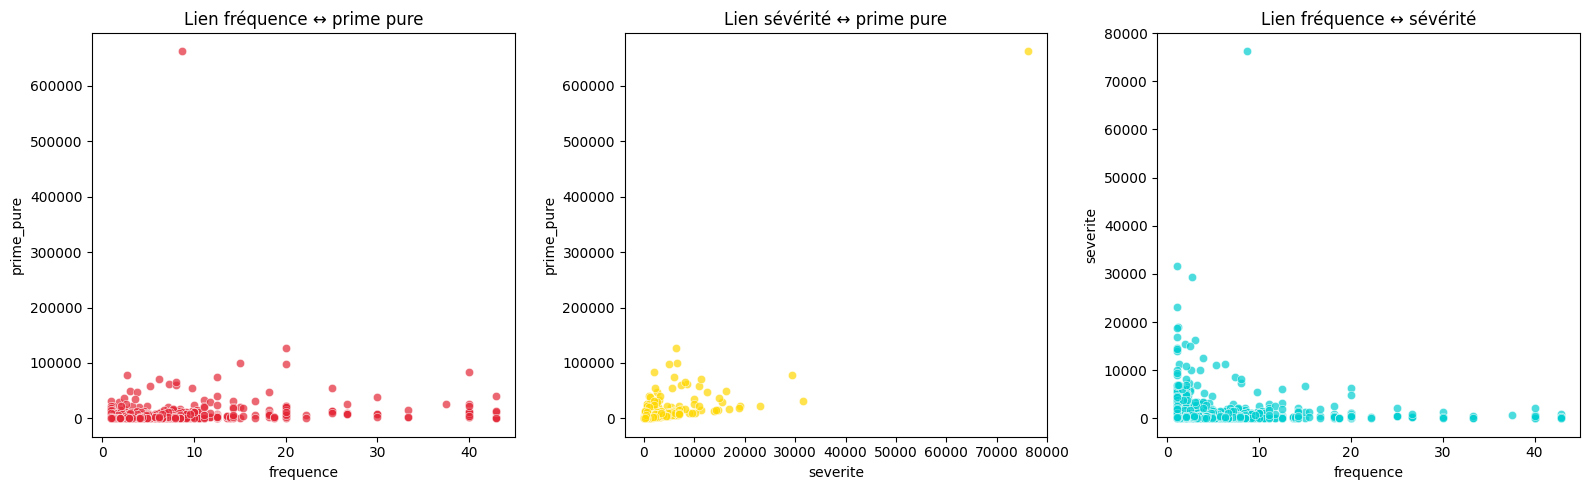


📘 Résumé agrégé des équilibres internes :
                         Valeur
Cout moyen          1139.619613
Prime pure moyenne  2606.166019
Fréquence moyenne      3.505207
Sévérité moyenne     780.769989

📊 Vérification finale du DataFrame df_t2 :
---------------------------------------------------
📘 Structure du DataFrame :
<class 'pandas.core.frame.DataFrame'>
Index: 2740 entries, 0 to 2764
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   exposition     2740 non-null   float64 
 1   zone           2740 non-null   category
 2   puissance      2740 non-null   int64   
 3   agevehicule    2740 non-null   int64   
 4   ageconducteur  2740 non-null   int64   
 5   bonus          2740 non-null   int64   
 6   marque         2740 non-null   category
 7   carburant      2740 non-null   category
 8   densite        2740 non-null   int64   
 9   region         2740 non-null   category
 10  nbre           2740 non-nul

In [18]:
# ======================================================
# ETAPE 2 — COHERENCES STRUCTURANTES
# ------------------------------------------------------
# Vérifications et corrections des équilibres internes :
# - logique sinistre / coût (IFRS 17)
# - équilibre prime pure = frequence × severite
# - cohérences structurelles globales
# - vérifications finales (info / head / describe)
# ======================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Logique sinistre / coût
# ----------------------------
incoh = df_t2[((df_t2["nbre"] == 0) & (df_t2["cout"] > 0)) |
              ((df_t2["nbre"] > 0) & (df_t2["cout"] == 0))]
print(f"\n⚠️ Lignes incohérentes sinistre/coût détectées : {len(incoh)}")

# Correction 1 : pas de coût sans sinistre
mask_cost_wo_claim = (df_t2["nbre"] == 0) & (df_t2["cout"] > 0)
df_t2.loc[mask_cost_wo_claim, "nbre"] = 1

# Correction 2 : pas de sinistre sans coût
mask_claim_wo_cost = (df_t2["nbre"] > 0) & (df_t2["cout"] == 0)
median_sev = df_t2.loc[df_t2["nbre"] > 0, "cout"].div(df_t2["nbre"]).median()
df_t2.loc[mask_claim_wo_cost, "cout"] = df_t2.loc[mask_claim_wo_cost, "nbre"] * median_sev

print("✅ Cohérence sinistre/coût corrigée selon IFRS 17")

# 2️⃣ Équilibre actuariel prime pure = frequence × severite
# ---------------------------------------------------------
df_t2["ecart_prime"] = df_t2["prime_pure"] - (df_t2["frequence"] * df_t2["severite"])
ecart_moy = df_t2["ecart_prime"].abs().mean()
print(f"📊 Écart moyen (prime_pure − freq×sev) : {round(ecart_moy, 6)}")

if ecart_moy <= 1e-3:
    print("✅ Équilibre parfait entre fréquence, sévérité et prime pure")
else:
    print("⚠️ Léger écart détecté : vérifier les calculs de fréquence/sévérité")

# 3️⃣ Vérification logique des ratios
# ----------------------------------
check_freq_0 = df_t2.loc[(df_t2["nbre"] == 0) & (df_t2["frequence"] != 0)]
check_pure_0 = df_t2.loc[(df_t2["nbre"] == 0) & (df_t2["prime_pure"] != 0)]

print("🚨 Contrats avec nbre=0 mais frequence≠0 :", len(check_freq_0))
print("🚨 Contrats avec nbre=0 mais prime_pure≠0 :", len(check_pure_0))

# 4️⃣ Analyse visuelle des cohérences internes
# --------------------------------------------
fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.scatterplot(x="frequence", y="prime_pure", data=df_t2, ax=axs[0], color="#E32636", alpha=0.7)
axs[0].set_title("Lien fréquence ↔ prime pure")

sns.scatterplot(x="severite", y="prime_pure", data=df_t2, ax=axs[1], color="#FFD700", alpha=0.7)
axs[1].set_title("Lien sévérité ↔ prime pure")

sns.scatterplot(x="frequence", y="severite", data=df_t2, ax=axs[2], color="#00CED1", alpha=0.7)
axs[2].set_title("Lien fréquence ↔ sévérité")

plt.tight_layout()
plt.show()

# 5️⃣ Vérification agrégée du portefeuille
# ----------------------------------------
resume_coherence = pd.DataFrame({
    "Cout moyen"        : [df_t2["cout"].mean()],
    "Prime pure moyenne": [df_t2["prime_pure"].mean()],
    "Fréquence moyenne" : [df_t2["frequence"].mean()],
    "Sévérité moyenne"  : [df_t2["severite"].mean()]
}).T.rename(columns={0:"Valeur"})
print("\n📘 Résumé agrégé des équilibres internes :")
print(resume_coherence)

# 6️⃣ Vérifications structurelles finales (info / head / describe)
# ---------------------------------------------------------------
print("\n📊 Vérification finale du DataFrame df_t2 :")
print("---------------------------------------------------")
print("📘 Structure du DataFrame :")
df_t2.info()

print("\n👀 Aperçu des premières lignes :")
print(df_t2.head())

print("\n📈 Statistiques descriptives globales :")
print(df_t2.describe(include='all'))


<ul style="font-family:'Times New Roman', Times, serif; font-size:18px; line-height:1.7;
           list-style-type:'❖ '; color:#FFD700; margin-top:12px; margin-bottom:20px;
           padding-left:50px;">
  <li style="margin-bottom:12px;">
    <span style="color:white;">Gestion des valeurs extrêmes :</span> Mise en œuvre d’une 
    <b>politique claire et traçable</b> de traitement des outliers 
    (winsorisation, capping ou exclusion contrôlée selon le cas).
  </li>
</ul>


🔎 Résumé outliers (toutes les numériques) — trié par sévérité (MAD, IQR, p1/p99)
               count          mean           std          Q1           Q3          IQR      IQR_low     IQR_high  Nb_out_IQR  Pct_out_IQR            p1           p99  Nb_out_Q  Pct_out_Q  Nb_out_MAD  Pct_out_MAD       Skew         Kurt
variable                                                                                                                                                                                                                                   
prime_pure      2740  2.606166e+03  1.427982e+04  306.726062  1785.121709  1478.395646 -1910.867408  4002.715178         330     0.120438  3.839740e+01  2.811572e+04        56   0.020438         361     0.131752  37.039700  1674.453444
severite        2740  7.807700e+02  2.220423e+03  156.278750   708.912500   552.633750  -672.671875  1537.863125         257     0.093796  1.579360e+01  7.256881e+03        56   0.020438         271     0.09890

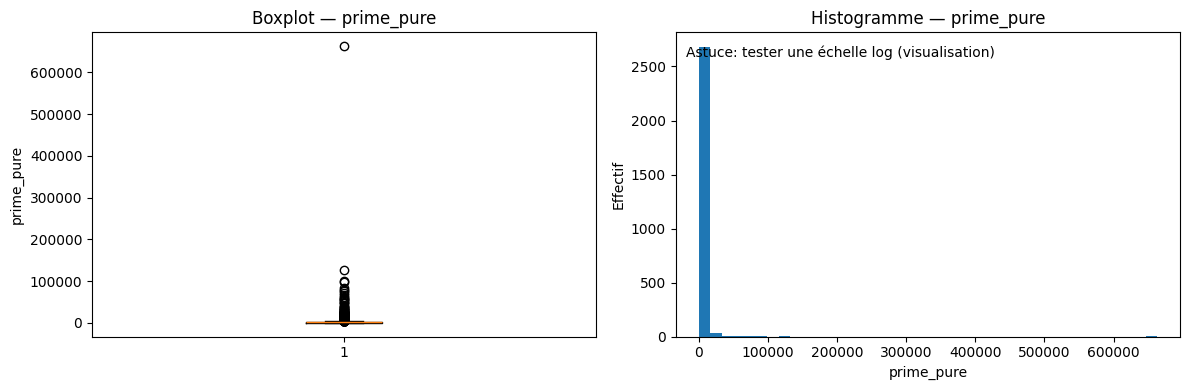

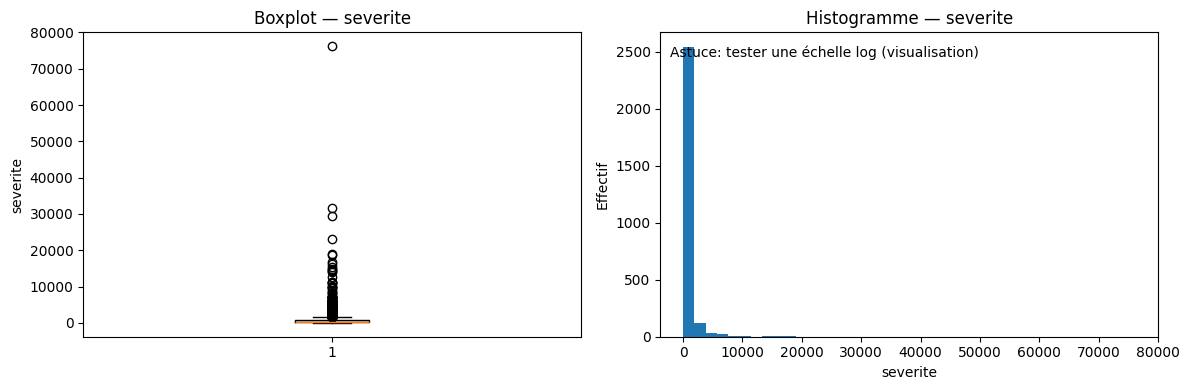

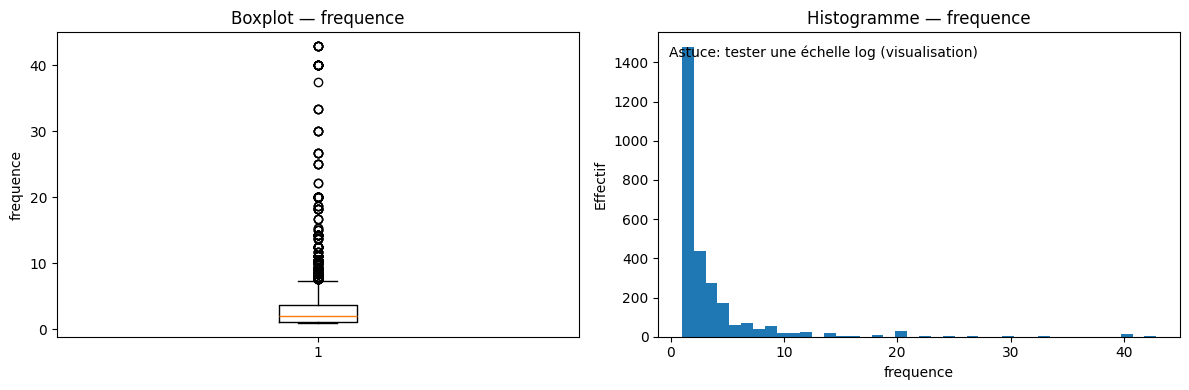

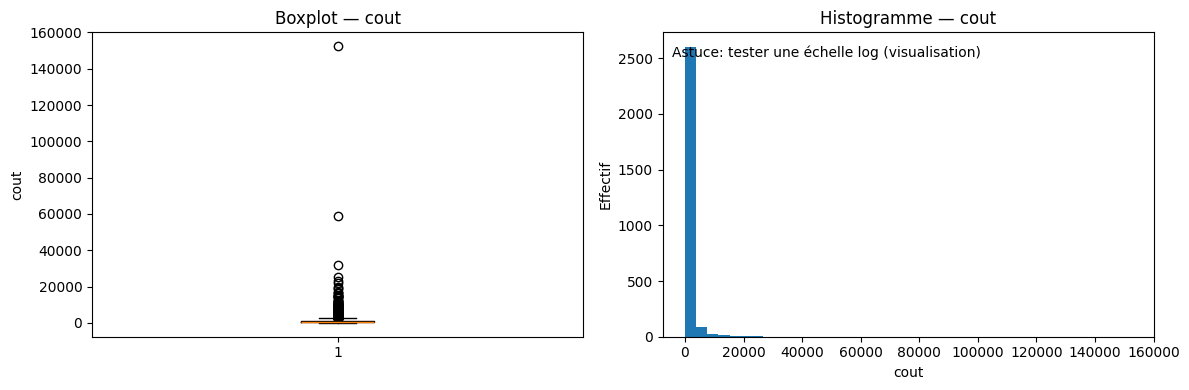

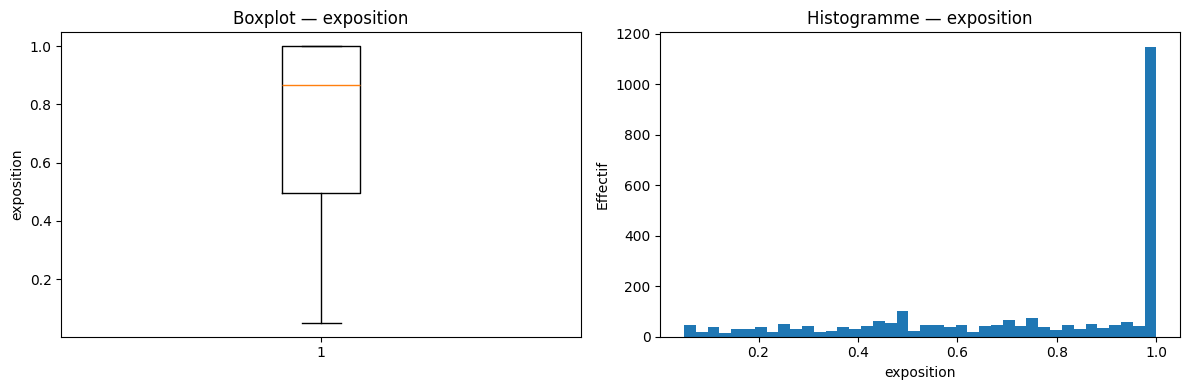

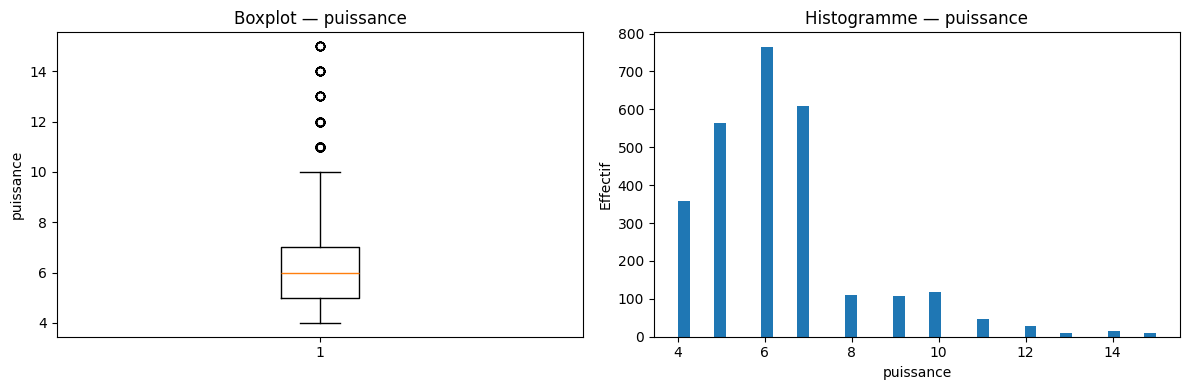

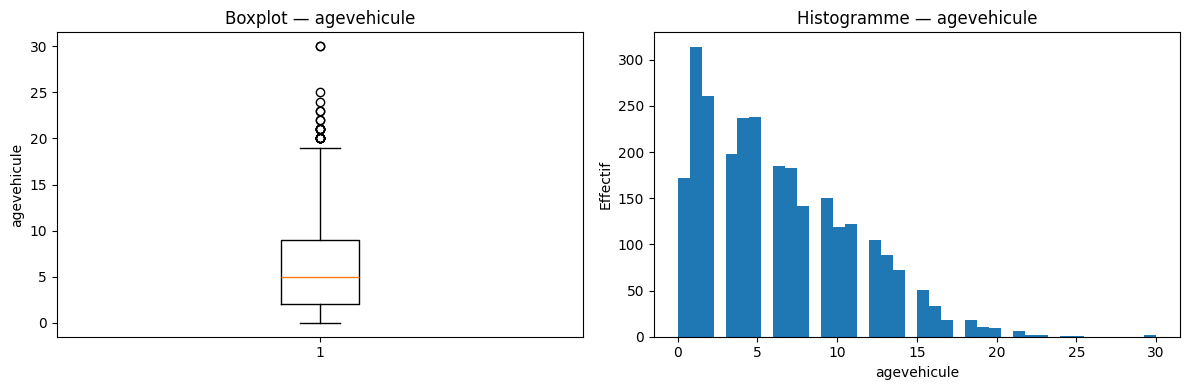

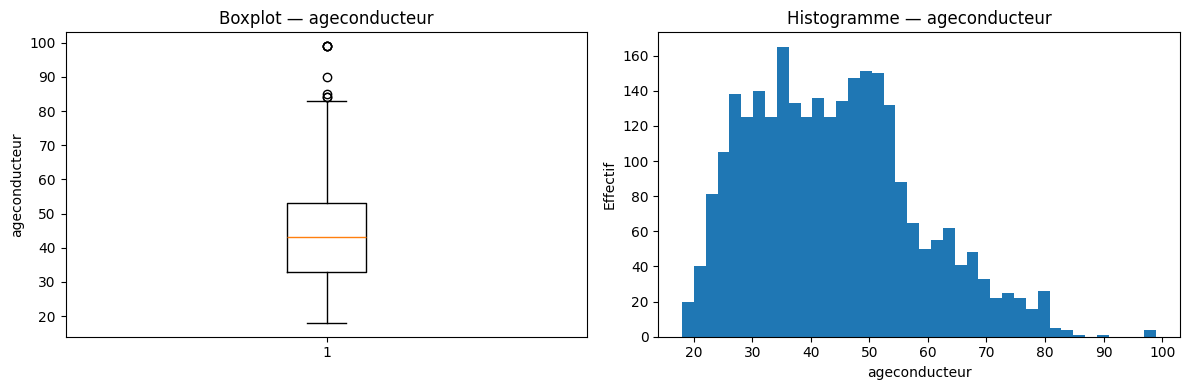

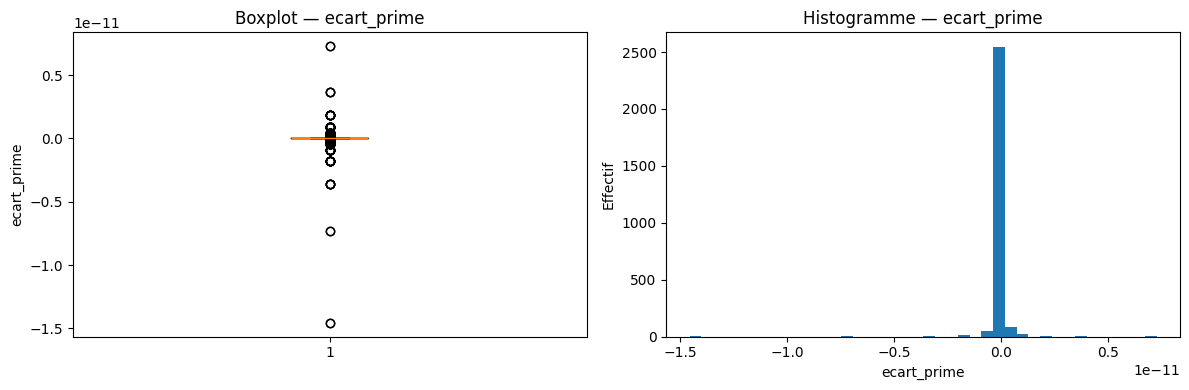

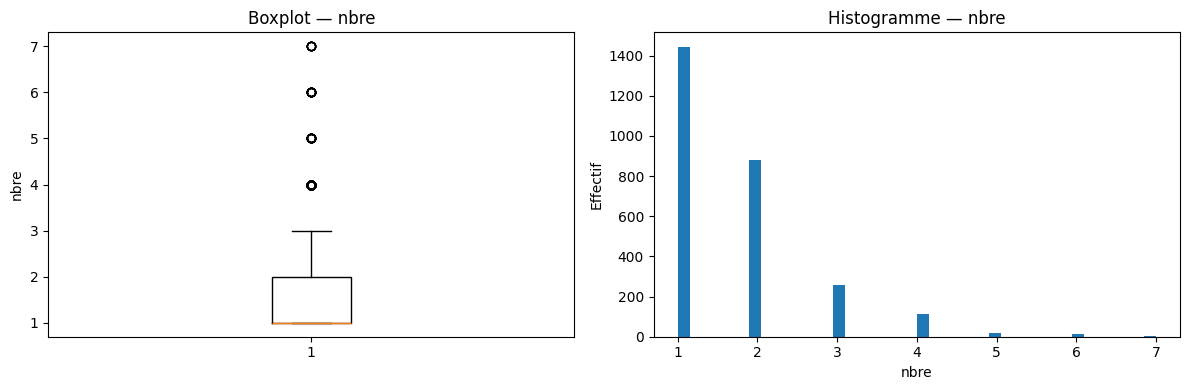

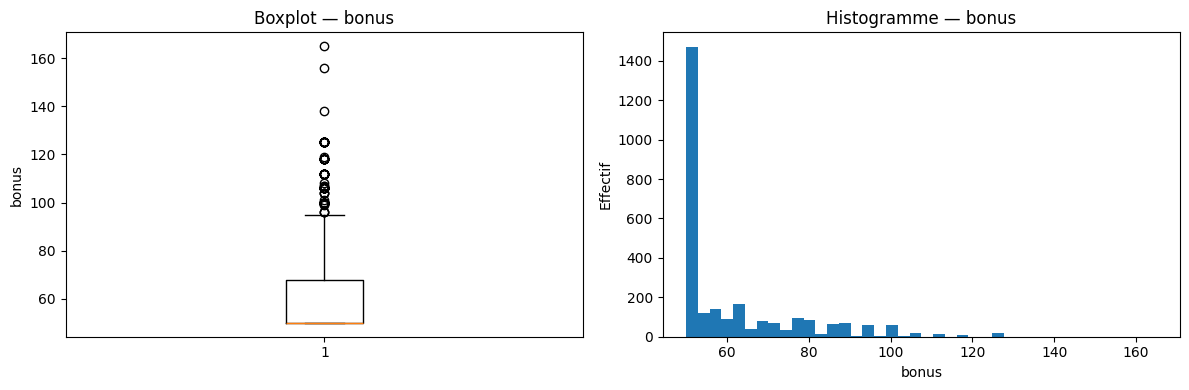

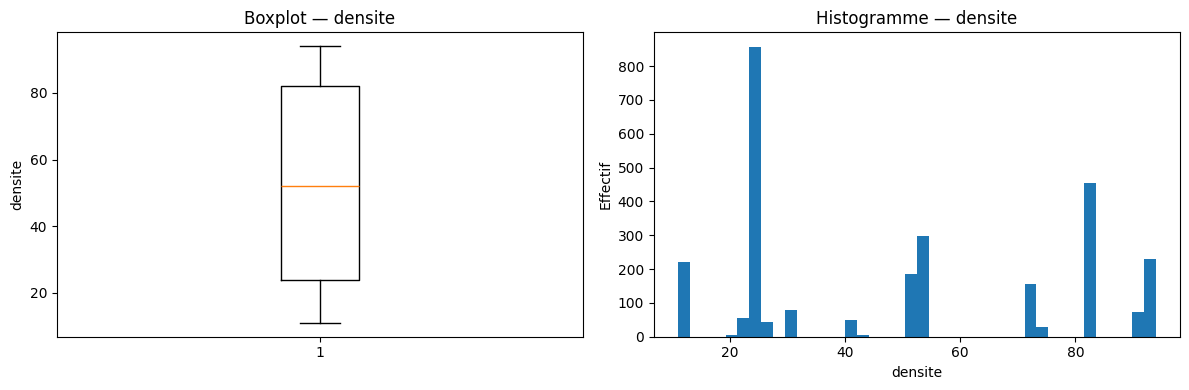


📘 Vérifications (df_t2 inchangé) :
— Structure :
<class 'pandas.core.frame.DataFrame'>
Index: 2740 entries, 0 to 2764
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   exposition     2740 non-null   float64 
 1   zone           2740 non-null   category
 2   puissance      2740 non-null   int64   
 3   agevehicule    2740 non-null   int64   
 4   ageconducteur  2740 non-null   int64   
 5   bonus          2740 non-null   int64   
 6   marque         2740 non-null   category
 7   carburant      2740 non-null   category
 8   densite        2740 non-null   int64   
 9   region         2740 non-null   category
 10  nbre           2740 non-null   int64   
 11  garantie       2740 non-null   category
 12  cout           2740 non-null   float64 
 13  frequence      2740 non-null   float64 
 14  severite       2740 non-null   float64 
 15  prime_pure     2740 non-null   float64 
 16  ecart_prime    2740 non-null   fl

In [19]:
# ======================================================
# ETAPE 3 — DETECTION DES OUTLIERS (SANS MODIFIER LES DONNEES)
# Version améliorée : toutes les colonnes numériques + 3 critères (IQR, p1/p99, MAD z-score)
# ======================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

assert 'df_t2' in globals() and isinstance(df_t2, pd.DataFrame), "df_t2 introuvable."

# ----------------------------
# Paramètres ajustables
# ----------------------------
Q_LOW, Q_HIGH = 0.01, 0.99   # quantiles pour la règle percentiles
MAD_Z_THRESH = 3.5           # seuil usuel robuste (≈3.5) pour |z_robuste|
MAX_VARS_PLOT = 12           # nombre max de variables à tracer (pour ne pas saturer l'écran)
BINS_HIST = 40               # nb. de classes pour les histogrammes
SHOW_LOG_HINT = True         # suggère une échelle log si skew > 2

# ----------------------------
# Préparation
# ----------------------------
# Auto-détection des colonnes numériques
num_cols = df_t2.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) == 0:
    raise ValueError("Aucune colonne numérique détectée dans df_t2.")

# Fonction utilitaire : z-score robuste basé sur MAD
def robust_z_score(x: pd.Series) -> pd.Series:
    x = pd.to_numeric(x, errors="coerce")
    med = x.median()
    mad = (np.abs(x - med)).median()
    if mad == 0 or np.isnan(mad):
        # Aucun étalement ou données trop dégénérées → tout à 0
        return pd.Series(np.zeros(len(x)), index=x.index)
    return 0.6745 * (x - med) / mad

def detect_outliers_stats(s: pd.Series, q_low=Q_LOW, q_high=Q_HIGH, mad_thresh=MAD_Z_THRESH):
    """Calcule bornes IQR, quantiles, MAD z-score + effectifs & taux. Ne modifie pas s."""
    s = pd.to_numeric(s, errors="coerce").replace([np.inf, -np.inf], np.nan).dropna()
    if s.empty:
        return {
            "count": 0, "mean": np.nan, "std": np.nan,
            "Q1": np.nan, "Q3": np.nan, "IQR": np.nan,
            "IQR_low": np.nan, "IQR_high": np.nan, "Nb_out_IQR": 0, "Pct_out_IQR": 0.0,
            f"p{int(q_low*100)}": np.nan, f"p{int(q_high*100)}": np.nan,
            "Nb_out_Q": 0, "Pct_out_Q": 0.0,
            "Nb_out_MAD": 0, "Pct_out_MAD": 0.0,
            "Skew": np.nan, "Kurt": np.nan
        }, {"iqr": [], "qntl": [], "mad": []}

    # Moments & bornes
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    fence_low, fence_high = q1 - 1.5 * iqr, q3 + 1.5 * iqr

    p_low, p_high = s.quantile(q_low), s.quantile(q_high)

    rz = robust_z_score(s)
    iqr_mask  = (s < fence_low) | (s > fence_high)
    qntl_mask = (s < p_low)     | (s > p_high)
    mad_mask  = rz.abs() > mad_thresh

    n = int(s.size)
    n_iqr, n_qntl, n_mad = int(iqr_mask.sum()), int(qntl_mask.sum()), int(mad_mask.sum())

    stats = {
        "count": n,
        "mean": s.mean(),
        "std": s.std(ddof=1),
        "Q1": q1, "Q3": q3, "IQR": iqr,
        "IQR_low": fence_low, "IQR_high": fence_high,
        "Nb_out_IQR": n_iqr, "Pct_out_IQR": n_iqr / n if n else 0.0,
        f"p{int(q_low*100)}": p_low, f"p{int(q_high*100)}": p_high,
        "Nb_out_Q": n_qntl, "Pct_out_Q": n_qntl / n if n else 0.0,
        "Nb_out_MAD": n_mad, "Pct_out_MAD": n_mad / n if n else 0.0,
        "Skew": s.skew(), "Kurt": s.kurt()
    }

    idxs = {
        "iqr":  s.index[iqr_mask].tolist(),
        "qntl": s.index[qntl_mask].tolist(),
        "mad":  s.index[mad_mask].tolist()
    }
    return stats, idxs

# 1) Résumé chiffré + indices des outliers par variable
rows = []
outlier_indices = {}  # dict: var -> {"iqr":[...], "qntl":[...], "mad":[...]}

for c in num_cols:
    stats, idxs = detect_outliers_stats(df_t2[c])
    stats["variable"] = c
    rows.append(stats)
    outlier_indices[c] = idxs

outlier_summary = (
    pd.DataFrame(rows)
      .set_index("variable")
      .sort_values(["Pct_out_MAD","Pct_out_IQR","Pct_out_Q"], ascending=False)
)

# Colonnes à afficher (claires & actionnables)
cols_to_show = [
    "count","mean","std",
    "Q1","Q3","IQR","IQR_low","IQR_high","Nb_out_IQR","Pct_out_IQR",
    "p1","p99","Nb_out_Q","Pct_out_Q",
    "Nb_out_MAD","Pct_out_MAD",
    "Skew","Kurt"
]
existing_cols = [c for c in cols_to_show if c in outlier_summary.columns]

print("\n🔎 Résumé outliers (toutes les numériques) — trié par sévérité (MAD, IQR, p1/p99)")
print(outlier_summary[existing_cols].to_string())

# 2) Visualisations (option: limiter le nombre de variables pour lisibilité)
vars_to_plot = outlier_summary.index.tolist()[:MAX_VARS_PLOT]
if len(vars_to_plot) > 0:
    # Chaque variable aura sa figure (2 sous-graphiques : boxplot + histo)
    for c in vars_to_plot:
        s = pd.to_numeric(df_t2[c], errors="coerce").replace([np.inf, -np.inf], np.nan).dropna()
        if s.empty:
            continue

        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        # Boxplot
        axes[0].boxplot(s, vert=True, showfliers=True)
        axes[0].set_title(f"Boxplot — {c}")
        axes[0].set_ylabel(c)

        # Histogramme
        axes[1].hist(s, bins=BINS_HIST)
        axes[1].set_title(f"Histogramme — {c}")
        axes[1].set_xlabel(c)
        axes[1].set_ylabel("Effectif")

        # Indication pour échelle log si très asymétrique
        if SHOW_LOG_HINT:
            try:
                skew_val = s.skew()
                if skew_val is not None and np.isfinite(skew_val) and skew_val > 2:
                    axes[1].text(0.02, 0.92, "Astuce: tester une échelle log (visualisation)",
                                 transform=axes[1].transAxes)
            except Exception:
                pass

        plt.tight_layout()
        plt.show()

    if len(outlier_summary.index) > MAX_VARS_PLOT:
        print(f"ℹ️ Visualisations limitées à {MAX_VARS_PLOT} variables (sur {len(outlier_summary.index)}). "
              f"Ajuste MAX_VARS_PLOT pour en voir davantage.")

# 3) Vérifications structurelles non bloquantes
print("\n📘 Vérifications (df_t2 inchangé) :")
print("— Structure :")
df_t2.info()

print("\n— Aperçu :")
print(df_t2.head())

print("\n— Descriptives numériques (auto) :")
print(df_t2[num_cols].describe())

# 4) À disposition pour inspection : outlier_indices
# Exemple d'usage :
#   outlier_indices['prime_pure']['mad']  -> donne la liste des index jugés extrêmes par MAD pour 'prime_pure'


In [20]:
# ======================================================
# ETAPE 3 — TRAITEMENT DES OUTLIERS (WINSORISATION/CAPPING)
# Entrée  : df_t2
# Sortie  : df_t3 (mêmes colonnes, sans colonnes supplémentaires)
# Politique par défaut : cap aux quantiles p1–p99
# ======================================================

import numpy as np
import pandas as pd

df_t3 = df_t2.copy()

cols_to_cap = ["cout", "severite", "prime_pure", "densite"]  # ajuste si besoin
Q_LOW, Q_HIGH = 0.01, 0.99

# 1) Calcul des bornes de capping
caps = {}
for c in cols_to_cap:
    if c in df_t3.columns:
        lo, hi = df_t3[c].quantile(Q_LOW), df_t3[c].quantile(Q_HIGH)
        caps[c] = (lo, hi)

# 2) Winsorisation / capping in-place
def winsorize_inplace(df, col, lo, hi):
    above = int((df[col] > hi).sum()); below = int((df[col] < lo).sum())
    df[col] = df[col].clip(lower=lo, upper=hi)
    print(f"↳ {col}: cap [{lo:.4f}, {hi:.4f}] | >hi capés:{above} | <lo capés:{below}")

print("\n🛠️ Application du capping (p1–p99) :")
for c,(lo,hi) in caps.items():
    winsorize_inplace(df_t3, c, lo, hi)

# (Optionnel) cap doux sur frequence :
# if "frequence" in df_t3.columns:
#     lo, hi = df_t3["frequence"].quantile(Q_LOW), df_t3["frequence"].quantile(Q_HIGH)
#     winsorize_inplace(df_t3, "frequence", lo, hi)

# 3) Vérifications structurelles après traitement
print("\n📘 Vérification df_t3 (après traitement outliers) :")
print("— Structure :")
df_t3.info()
print("\n— Aperçu :")
print(df_t3.head())
print("\n— Descriptives clés :")
print(df_t3[["cout","severite","prime_pure","densite","frequence","exposition","nbre"]].describe())



🛠️ Application du capping (p1–p99) :
↳ cout: cap [29.8617, 10800.2594] | >hi capés:28 | <lo capés:28
↳ severite: cap [15.7936, 7256.8808] | >hi capés:28 | <lo capés:28
↳ prime_pure: cap [38.3974, 28115.7213] | >hi capés:28 | <lo capés:28
↳ densite: cap [11.0000, 93.0000] | >hi capés:10 | <lo capés:0

📘 Vérification df_t3 (après traitement outliers) :
— Structure :
<class 'pandas.core.frame.DataFrame'>
Index: 2740 entries, 0 to 2764
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   exposition     2740 non-null   float64 
 1   zone           2740 non-null   category
 2   puissance      2740 non-null   int64   
 3   agevehicule    2740 non-null   int64   
 4   ageconducteur  2740 non-null   int64   
 5   bonus          2740 non-null   int64   
 6   marque         2740 non-null   category
 7   carburant      2740 non-null   category
 8   densite        2740 non-null   int64   
 9   region         2740 non-null  

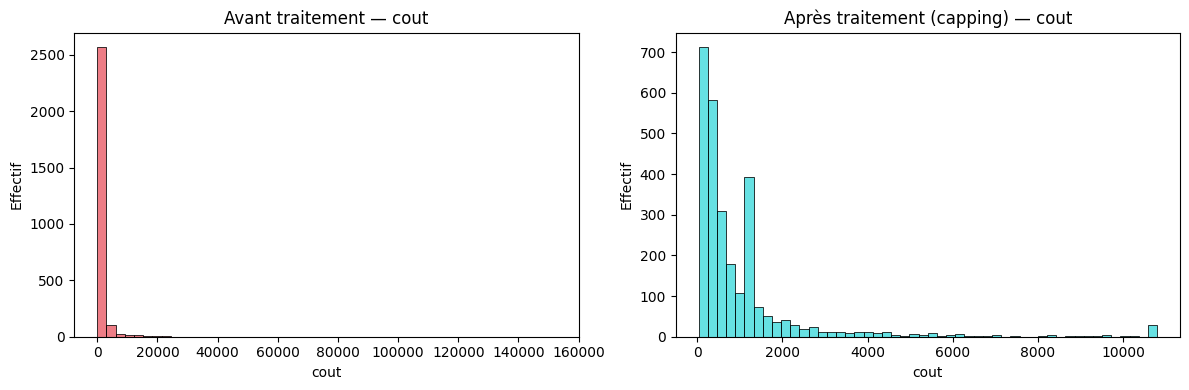

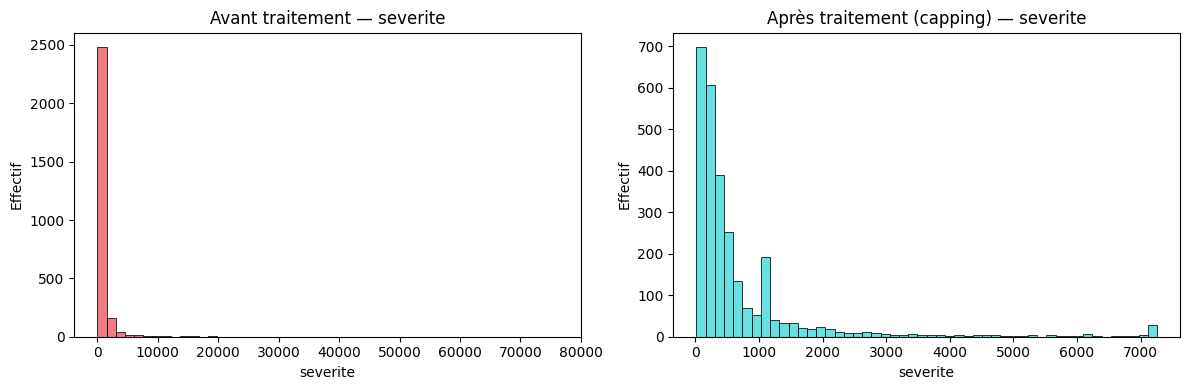

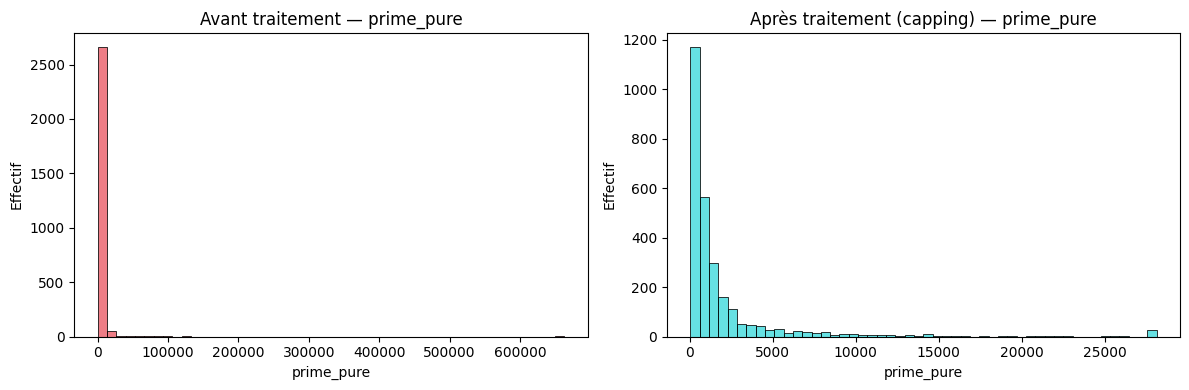


📘 Comparatif avant/après capping (moyenne, écart-type, min, max) :

                      cout      severite     prime_pure
Avant (moy)    1139.619613    780.769989    2606.166019
Après (moy)    1019.587408    690.728949    2100.006217
Δ_moy (%)       -10.530000    -11.530000     -19.420000
Avant (std)    3692.519698   2220.422877   14279.818103
Après (std)    1622.694727   1105.926761    4145.233400
Δ_std (%)       -56.050000    -50.190000     -70.970000
Avant (min)       0.010000      0.000000       0.000000
Après (min)      29.861700     15.793600      38.397400
Avant (max)  152449.020000  76224.510000  662821.826087
Après (max)   10800.259400   7256.880800   28115.721274

🧠 Interprétation automatique :

🔹 COUT :
   → Moyenne modifiée (-10.53%) ⚠️ à surveiller
   → Variabilité réduite (-56.05%) 👍 (stabilisation réussie)

🔹 SEVERITE :
   → Moyenne modifiée (-11.53%) ⚠️ à surveiller
   → Variabilité réduite (-50.19%) 👍 (stabilisation réussie)

🔹 PRIME_PURE :
   → Moyenne modifiée (-1

In [21]:
# ======================================================
# ANALYSE AVANT / APRÈS CAPPING
# Objectif : comparer visuellement et numériquement l'effet du capping
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables à comparer
vars_to_analyze = ["cout", "severite", "prime_pure"]

# 1️⃣ VISUALISATION : histogrammes avant/après
for v in vars_to_analyze:
    if v not in df_t2.columns or v not in df_t3.columns:
        continue

    plt.figure(figsize=(12, 4))
    
    # Histogramme avant
    plt.subplot(1, 2, 1)
    sns.histplot(df_t2[v], bins=50, color="#E32636", alpha=0.6)
    plt.title(f"Avant traitement — {v}")
    plt.xlabel(v)
    plt.ylabel("Effectif")

    # Histogramme après
    plt.subplot(1, 2, 2)
    sns.histplot(df_t3[v], bins=50, color="#00CED1", alpha=0.6)
    plt.title(f"Après traitement (capping) — {v}")
    plt.xlabel(v)
    plt.ylabel("Effectif")

    plt.tight_layout()
    plt.show()


# 2️⃣ TABLEAU COMPARATIF : statistiques avant/après
def compare_stats(col):
    """Retourne les statistiques clés avant/après capping."""
    data = {
        "Avant (moy)": df_t2[col].mean(),
        "Après (moy)": df_t3[col].mean(),
        "Δ_moy (%)": round(100 * (df_t3[col].mean() - df_t2[col].mean()) / df_t2[col].mean(), 2),
        "Avant (std)": df_t2[col].std(),
        "Après (std)": df_t3[col].std(),
        "Δ_std (%)": round(100 * (df_t3[col].std() - df_t2[col].std()) / df_t2[col].std(), 2),
        "Avant (min)": df_t2[col].min(),
        "Après (min)": df_t3[col].min(),
        "Avant (max)": df_t2[col].max(),
        "Après (max)": df_t3[col].max()
    }
    return pd.Series(data)

comparatif_capping = pd.concat({v: compare_stats(v) for v in vars_to_analyze}, axis=1)
print("\n📘 Comparatif avant/après capping (moyenne, écart-type, min, max) :\n")
print(comparatif_capping)


# 3️⃣ INTERPRÉTATION AUTOMATIQUE
print("\n🧠 Interprétation automatique :")
for v in vars_to_analyze:
    delta_moy = comparatif_capping.loc["Δ_moy (%)", v]
    delta_std = comparatif_capping.loc["Δ_std (%)", v]
    print(f"\n🔹 {v.upper()} :")
    if abs(delta_moy) < 5:
        print(f"   → Moyenne stable ({delta_moy:+.2f}%) ✅")
    else:
        print(f"   → Moyenne modifiée ({delta_moy:+.2f}%) ⚠️ à surveiller")
    if delta_std < 0:
        print(f"   → Variabilité réduite ({delta_std:+.2f}%) 👍 (stabilisation réussie)")
    elif delta_std > 0:
        print(f"   → Variabilité augmentée ({delta_std:+.2f}%) ⚠️ incohérence possible")
    else:
        print(f"   → Variabilité inchangée ({delta_std:+.2f}%) ✅")


<ul style="font-family:'Times New Roman', Times, serif; font-size:18px; line-height:1.7;
           list-style-type:'❖ '; color:#FFD700; margin-top:12px; margin-bottom:20px;
           padding-left:50px;">
  <li style="margin-bottom:12px;">
    <span style="color:white;">Catégories rares :</span> Regroupement des modalités 
    <b>inférieures à 1 %</b> en catégories “Autres” pour améliorer la 
    stabilité des estimations et la robustesse statistique.
  </li>
</ul>

In [22]:
# ======================================================
# ETAPE 4 — TRAITEMENT DES CATÉGORIES RARES
# Objectif : regrouper les modalités < 1% en "Autres"
# Sortie : df_t4 (mêmes colonnes, catégories consolidées)
# ======================================================

import pandas as pd

df_t4 = df_t3.copy()

# 1️⃣ Variables catégorielles concernées
cat_vars = ["zone", "region", "marque", "carburant", "garantie"]

# 2️⃣ Seuil de rareté (% du portefeuille)
threshold = 0.01  # 1%

# 3️⃣ Fonction de regroupement
def regroup_rare_categories(df, col, seuil):
    """Regroupe les modalités représentant < seuil en 'Autres'."""
    freq = df[col].value_counts(normalize=True)
    rares = freq[freq < seuil].index
    nb_rares = len(rares)
    if nb_rares > 0:
        df[col] = df[col].apply(lambda x: "Autres" if x in rares else x)
        print(f"🔹 {col}: {nb_rares} modalités rares regroupées en 'Autres'")
    else:
        print(f"✅ {col}: aucune modalité rare détectée")
    return df

# 4️⃣ Application du regroupement
for col in cat_vars:
    if col in df_t4.columns:
        regroup_rare_categories(df_t4, col, seuil=threshold)

# ======================================================
# 5️⃣ VERIFICATIONS STRUCTURELLES ET DESCRIPTIVES
# ======================================================

print("\n📘 Vérification complète du DataFrame df_t4 (après regroupement catégories rares) :")
print("-------------------------------------------------------------")

# --- Structure générale ---
print("\n📊 Structure du DataFrame :")
df_t4.info()

# --- Aperçu des premières lignes ---
print("\n👀 Aperçu des premières lignes :")
print(df_t4.head())

# --- Statistiques descriptives globales ---
print("\n📈 Statistiques descriptives (numériques) :")
print(df_t4.describe(include=[np.number]))

# --- Statistiques descriptives des catégories ---
print("\n📊 Fréquences des principales modalités par variable catégorielle :")
for col in cat_vars:
    if col in df_t4.columns:
        print(f"\n{col} — top modalités (en %) :")
        print(df_t4[col].value_counts(normalize=True).mul(100).round(2).head(10))


✅ zone: aucune modalité rare détectée
✅ region: aucune modalité rare détectée
🔹 marque: 1 modalités rares regroupées en 'Autres'
✅ carburant: aucune modalité rare détectée
🔹 garantie: 2 modalités rares regroupées en 'Autres'

📘 Vérification complète du DataFrame df_t4 (après regroupement catégories rares) :
-------------------------------------------------------------

📊 Structure du DataFrame :
<class 'pandas.core.frame.DataFrame'>
Index: 2740 entries, 0 to 2764
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   exposition     2740 non-null   float64 
 1   zone           2740 non-null   category
 2   puissance      2740 non-null   int64   
 3   agevehicule    2740 non-null   int64   
 4   ageconducteur  2740 non-null   int64   
 5   bonus          2740 non-null   int64   
 6   marque         2740 non-null   category
 7   carburant      2740 non-null   category
 8   densite        2740 non-null   int64   
 9  

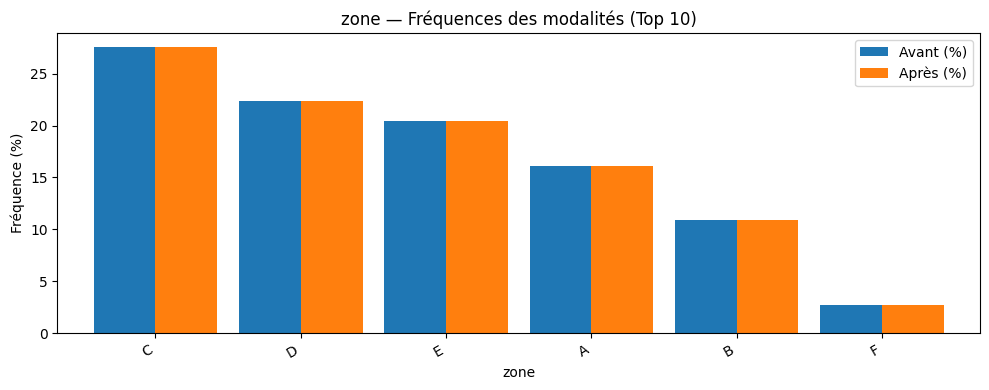

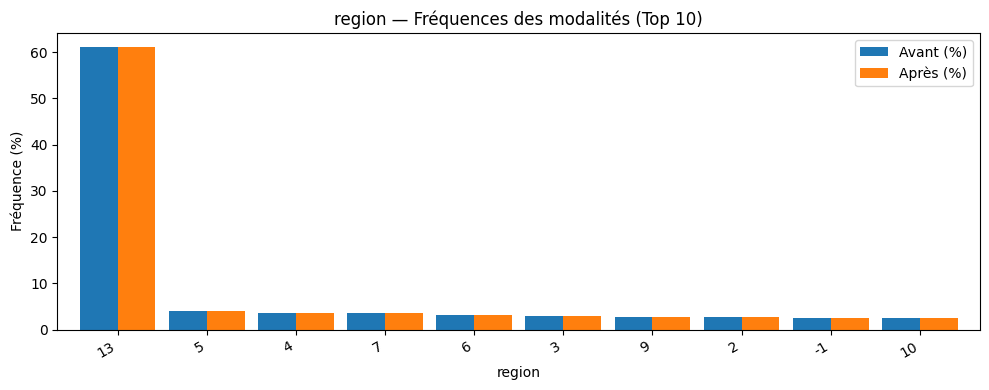

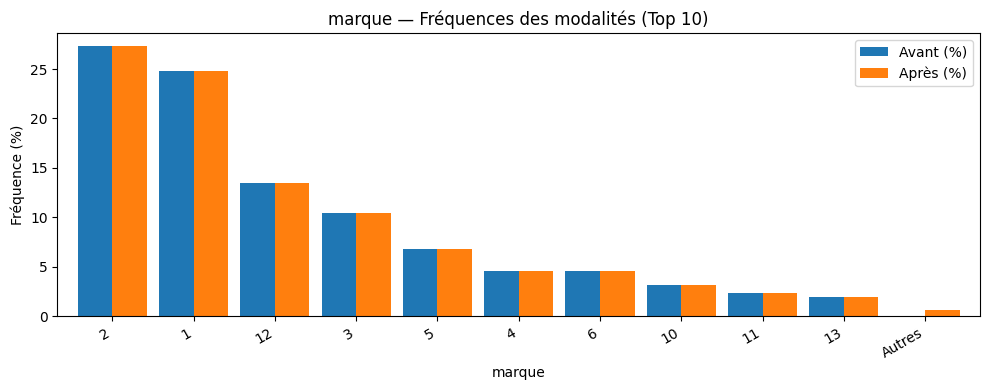

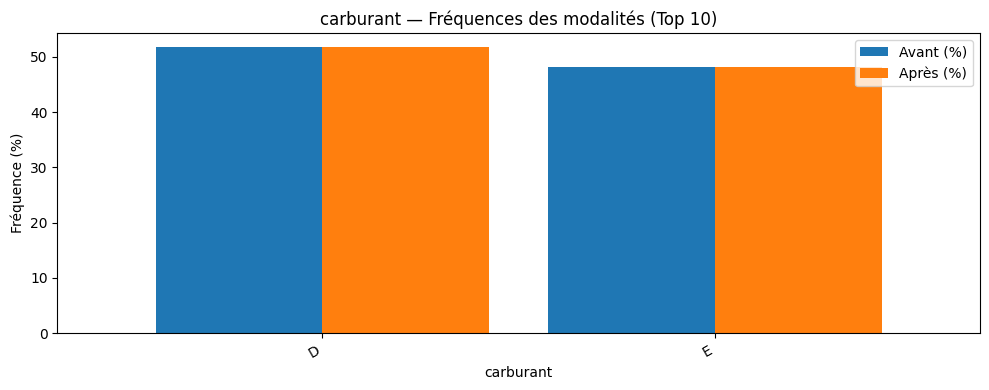

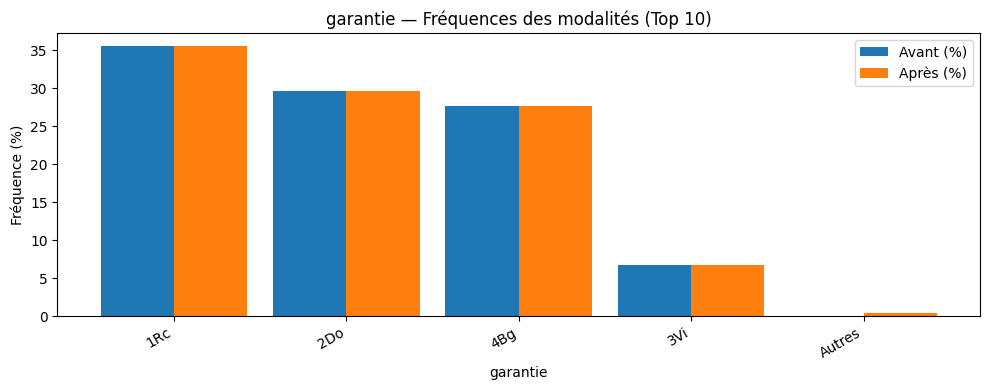

In [23]:
# ======================================================
# BARPLOTS COMPARATIFS : AVANT (df_t3) vs APRES (df_t4)
# Objectif : voir l'effet du regroupement des catégories rares
# ======================================================

import pandas as pd
import matplotlib.pyplot as plt

cat_vars = ["zone", "region", "marque", "carburant", "garantie"]
TOP_K = 10   # nombre max de modalités affichées (les plus fréquentes après regroupement)

def barplot_compare_categories(df_before, df_after, col, top_k=10):
    # fréquences en %
    before = df_before[col].value_counts(normalize=True).mul(100)
    after  = df_after[col].value_counts(normalize=True).mul(100)

    # on retient les TOP_K modalités d'après (et on inclut "Autres" si présent)
    keep = list(after.sort_values(ascending=False).head(top_k).index)
    if "Autres" in after.index and "Autres" not in keep:
        keep.append("Autres")

    # aligne les index (catégories) et remplit les manquants à 0
    idx = pd.Index(keep, name=col)
    comp = pd.DataFrame({
        "Avant (%)": before.reindex(idx).fillna(0),
        "Après (%)": after.reindex(idx).fillna(0)
    })

    # plot côte à côte
    ax = comp.plot(kind="bar", figsize=(10,4), width=0.85)
    ax.set_title(f"{col} — Fréquences des modalités (Top {top_k})")
    ax.set_ylabel("Fréquence (%)")
    ax.set_xlabel(col)
    ax.legend(loc="upper right")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

# --- Lancer pour chaque variable catégorielle ---
for c in cat_vars:
    if c in df_t3.columns and c in df_t4.columns:
        barplot_compare_categories(df_t3, df_t4, c, top_k=TOP_K)


In [24]:
df_t4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2740 entries, 0 to 2764
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   exposition     2740 non-null   float64 
 1   zone           2740 non-null   category
 2   puissance      2740 non-null   int64   
 3   agevehicule    2740 non-null   int64   
 4   ageconducteur  2740 non-null   int64   
 5   bonus          2740 non-null   int64   
 6   marque         2740 non-null   category
 7   carburant      2740 non-null   category
 8   densite        2740 non-null   int64   
 9   region         2740 non-null   category
 10  nbre           2740 non-null   int64   
 11  garantie       2740 non-null   object  
 12  cout           2740 non-null   float64 
 13  frequence      2740 non-null   float64 
 14  severite       2740 non-null   float64 
 15  prime_pure     2740 non-null   float64 
 16  ecart_prime    2740 non-null   float64 
dtypes: category(4), float64(6), int64(6), 

<ul style="font-family:'Times New Roman', Times, serif; font-size:18px; line-height:1.7;
           list-style-type:'❖ '; color:#FFD700; margin-top:12px; margin-bottom:20px;
           padding-left:50px;">
  <li>
    <span style="color:white;">Variables dérivées standard :</span> Construction des 
    <b>KPIs actuariels</b> (ratio sinistre/prime, fréquence, coût moyen, 
    taux de réclamation, etc.) à partir des variables de base.
  </li>
</ul>

In [25]:
# ======================================================
# ETAPE 5 — KPI ACTUARIELS (construction + validation)
# Entrée  : df_t4 (16 colonnes, dont frequence/severite/prime_pure déjà présents)
# Sortie  : df_t5 (mêmes colonnes, KPI recalculés proprement)
# Points clés :
#  - garantit les bons types (garantie → category)
#  - recalcul des 3 KPI de base de façon sûre (idempotent)
#  - garde-fous : pas de divisions par zéro, pas de valeurs négatives
#  - contrôles de cohérence
# ======================================================

import numpy as np
import pandas as pd

# 0) Copie de travail + types catégoriels cohérents
df_t5 = df_t4.copy()

if "garantie" in df_t5.columns:
    df_t5["garantie"] = df_t5["garantie"].astype("category")

# 1) Recalcul propre (écrasement sûr) des trois KPI standards
#    - frequence = nbre / exposition
#    - severite  = cout / nbre            (NaN si nbre = 0)
#    - prime_pure = cout / exposition
#    NB: On protège contre exposition <= 0 et nbre <= 0
expo_safe = df_t5["exposition"].clip(lower=1e-9)  # évite /0
nbre_safe = df_t5["nbre"].clip(lower=0)

df_t5["frequence"]  = nbre_safe / expo_safe
df_t5["severite"]   = np.where(df_t5["nbre"] > 0, df_t5["cout"] / df_t5["nbre"], np.nan)
df_t5["prime_pure"] = df_t5["cout"] / expo_safe

# 2) Garde-fous : aucune valeur négative pour les KPI
for c in ["frequence", "severite", "prime_pure"]:
    if c in df_t5.columns:
        df_t5.loc[df_t5[c] < 0, c] = np.nan

# 3) Contrôles de cohérence structurelle
#    - pas de coût sans sinistre (après les étapes précédentes, ça devrait être ok)
incoh1 = ((df_t5["nbre"] == 0) & (df_t5["cout"] > 0)).sum()
incoh2 = ((df_t5["nbre"] > 0) & (df_t5["cout"] == 0)).sum()

#    - prime_pure ≈ frequence × severite
prod = df_t5["frequence"] * df_t5["severite"]
ecart_abs = (df_t5["prime_pure"] - prod).abs()
mape = (ecart_abs / df_t5["prime_pure"].replace(0, np.nan)).median()  # MAPE médian

print("✅ KPI recalculés proprement.")
print(f"🔎 Incohérences nbre/cout restantes (attendu 0) : {incoh1 + incoh2}")
print(f"📊 MAPE médian de prime_pure vs freq×sev : {mape:.6f}")

# 4) Vérifications standards (toujours afficher ces 3 blocs après une étape)
print("\n📘 Structure df_t5 :")
df_t5.info()

print("\n👀 Aperçu :")
print(df_t5.head())

print("\n📈 Descriptives des KPI :")
print(df_t5[["frequence","severite","prime_pure"]].describe())


✅ KPI recalculés proprement.
🔎 Incohérences nbre/cout restantes (attendu 0) : 0
📊 MAPE médian de prime_pure vs freq×sev : 0.000000

📘 Structure df_t5 :
<class 'pandas.core.frame.DataFrame'>
Index: 2740 entries, 0 to 2764
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   exposition     2740 non-null   float64 
 1   zone           2740 non-null   category
 2   puissance      2740 non-null   int64   
 3   agevehicule    2740 non-null   int64   
 4   ageconducteur  2740 non-null   int64   
 5   bonus          2740 non-null   int64   
 6   marque         2740 non-null   category
 7   carburant      2740 non-null   category
 8   densite        2740 non-null   int64   
 9   region         2740 non-null   category
 10  nbre           2740 non-null   int64   
 11  garantie       2740 non-null   category
 12  cout           2740 non-null   float64 
 13  frequence      2740 non-null   float64 
 14  severite       2740 n

In [26]:
df_t5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2740 entries, 0 to 2764
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   exposition     2740 non-null   float64 
 1   zone           2740 non-null   category
 2   puissance      2740 non-null   int64   
 3   agevehicule    2740 non-null   int64   
 4   ageconducteur  2740 non-null   int64   
 5   bonus          2740 non-null   int64   
 6   marque         2740 non-null   category
 7   carburant      2740 non-null   category
 8   densite        2740 non-null   int64   
 9   region         2740 non-null   category
 10  nbre           2740 non-null   int64   
 11  garantie       2740 non-null   category
 12  cout           2740 non-null   float64 
 13  frequence      2740 non-null   float64 
 14  severite       2740 non-null   float64 
 15  prime_pure     2740 non-null   float64 
 16  ecart_prime    2740 non-null   float64 
dtypes: category(5), float64(6), int64(6)
m

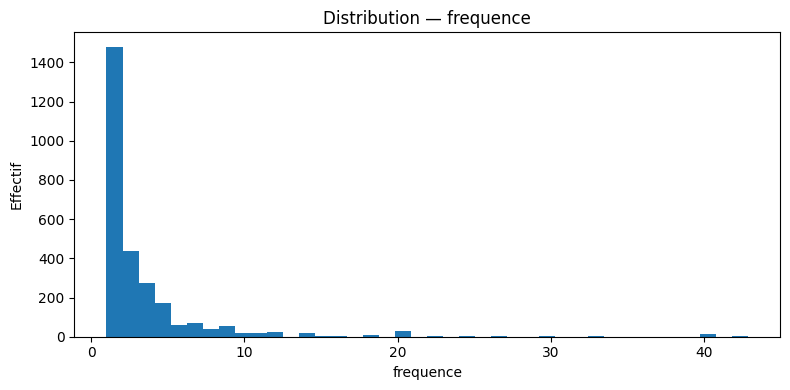

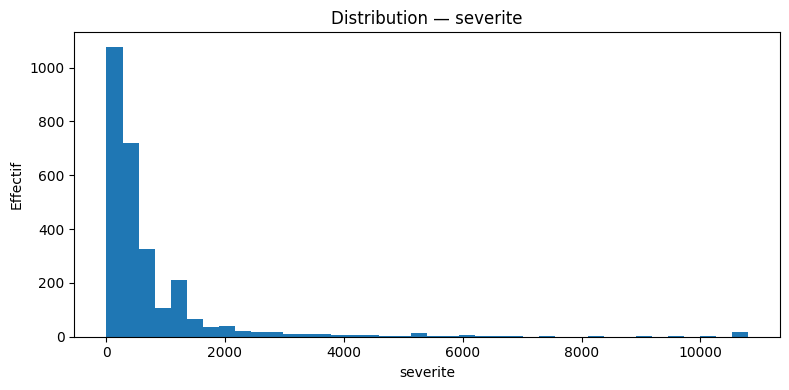

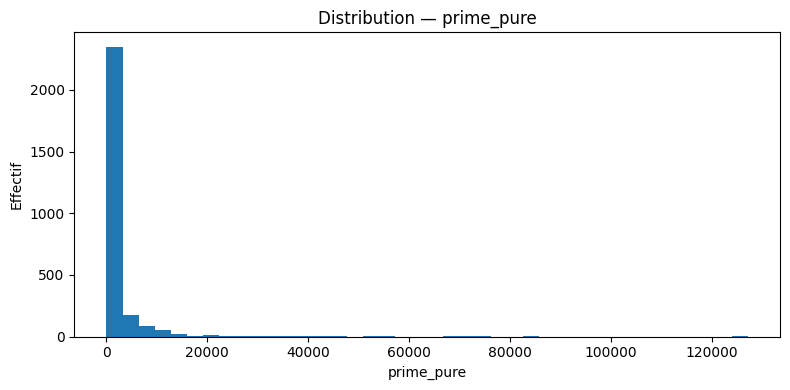

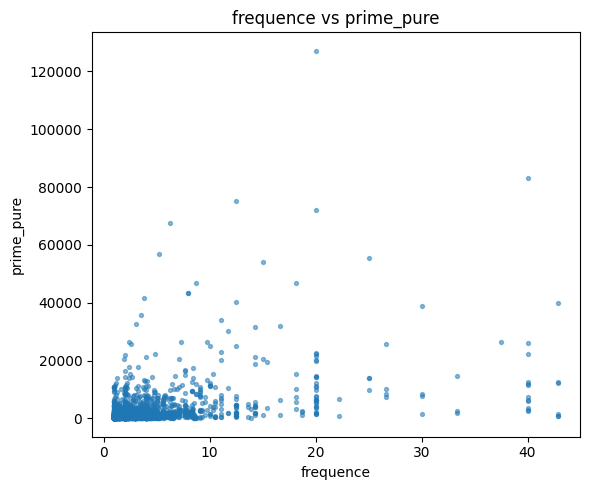

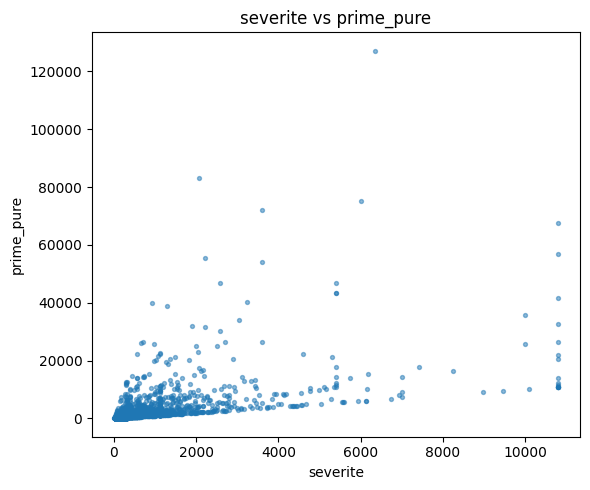

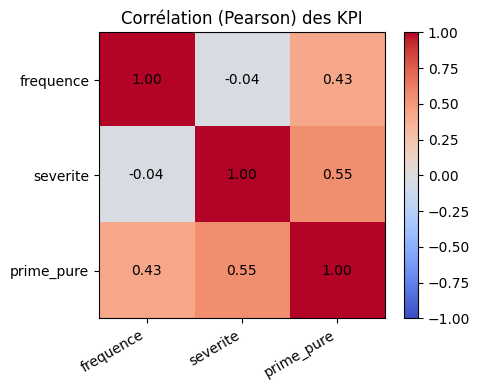

In [27]:
# ======================================================
# VISUALISATIONS KPI (distributions + relations)
# Objectif : vérifier la forme et les relations des KPI
# Outils : Matplotlib pur (robuste en notebooks)
# ======================================================

import numpy as np
import matplotlib.pyplot as plt

# A) Histogrammes des 3 KPI
vars_kpi = ["frequence", "severite", "prime_pure"]
for v in vars_kpi:
    if v in df_t5.columns:
        x = df_t5[v].replace([np.inf, -np.inf], np.nan).dropna()
        plt.figure(figsize=(8,4))
        plt.hist(x, bins=40)
        plt.title(f"Distribution — {v}")
        plt.xlabel(v)
        plt.ylabel("Effectif")
        plt.tight_layout()
        plt.show()

# B) Scatter frequence vs prime_pure & severite vs prime_pure
pairs = [("frequence","prime_pure"), ("severite","prime_pure")]
for xcol, ycol in pairs:
    if xcol in df_t5.columns and ycol in df_t5.columns:
        x = df_t5[xcol].replace([np.inf, -np.inf], np.nan)
        y = df_t5[ycol].replace([np.inf, -np.inf], np.nan)
        m = (~x.isna()) & (~y.isna())
        plt.figure(figsize=(6,5))
        plt.scatter(x[m], y[m], s=8, alpha=0.5)
        plt.xlabel(xcol)
        plt.ylabel(ycol)
        plt.title(f"{xcol} vs {ycol}")
        plt.tight_layout()
        plt.show()

# C) Heatmap de corrélation des KPI (Pearson)
import pandas as pd
kpi_df = df_t5[vars_kpi].replace([np.inf, -np.inf], np.nan)
corr = kpi_df.corr(numeric_only=True)

plt.figure(figsize=(5,4))
plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(vars_kpi)), vars_kpi, rotation=30, ha="right")
plt.yticks(range(len(vars_kpi)), vars_kpi)
plt.title("Corrélation (Pearson) des KPI")
# valeurs dans les cases
for i in range(len(vars_kpi)):
    for j in range(len(vars_kpi)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha="center", va="center", color="black")
plt.tight_layout()
plt.show()


<div style="text-align:center;">
  <h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif; text-align:center;
             margin-top:14px; margin-bottom:12px; max-width:90%; line-height:1.4;
             white-space:normal; word-wrap:break-word;">
    <b>C. Gouvernance & conformité (normatif)</b>
  </h3>
</div>


<ul style="font-family:'Times New Roman', Times, serif; font-size:18px; line-height:1.7;
           list-style-type:'❖ '; color:#FFD700; margin-top:12px; margin-bottom:20px;
           padding-left:50px;">
  <li style="margin-bottom:12px;">
    <span style="color:white;">Traçabilité des transformations :</span> Mise en place d’un 
    <b>audit mini-log</b> retraçant chaque étape de modification des données 
    (filtrage, imputation, normalisation) afin de garantir la 
    <b>transparence</b>, la <b>reproductibilité</b> et la <b>responsabilité</b> 
    dans le processus de préparation des données.
  </li>
</ul>

In [28]:
# === C1-1 | AUDITEUR LÉGER – helpers + classe ===
import os, json, sys, platform, hashlib, datetime as dt
from dataclasses import dataclass, asdict
from typing import List, Dict, Optional
import numpy as np
import pandas as pd

AUDIT_JSONL = "audit_log.jsonl"
AUDIT_CSV   = "audit_log.csv"

def _schema_signature(df: pd.DataFrame) -> Dict[str,str]:
    return {c: str(df[c].dtype) for c in df.columns}

def _na_counts(df: pd.DataFrame) -> Dict[str,int]:
    return df.isna().sum().to_dict()

def _num_stats(df: pd.DataFrame) -> Dict[str,Dict[str,float]]:
    out = {}
    for c in df.select_dtypes(include=[np.number]).columns:
        s = pd.to_numeric(df[c], errors="coerce")
        out[c] = {
            "min": float(s.min(skipna=True)) if s.notna().any() else np.nan,
            "max": float(s.max(skipna=True)) if s.notna().any() else np.nan,
            "mean": float(s.mean(skipna=True)) if s.notna().any() else np.nan,
            "std": float(s.std(skipna=True))  if s.notna().sum()>1 else np.nan,
        }
    return out

def _df_fingerprint(df: pd.DataFrame) -> str:
    """Empreinte du DF : schéma + 100 premières lignes stringifiées."""
    head = df.head(100).astype(str).to_csv(index=False).encode("utf-8")
    base = json.dumps(_schema_signature(df), sort_keys=True).encode("utf-8") + head
    return hashlib.sha256(base).hexdigest()

@dataclass
class AuditStep:
    step: str
    timestamp: str
    rows_before: int; rows_after: int
    cols_before: int; cols_after: int
    added_cols: List[str]; removed_cols: List[str]
    changed_dtypes: Dict[str,Dict[str,str]]
    na_before: Dict[str,int]; na_after: Dict[str,int]
    num_stats_before: Dict[str,Dict[str,float]]
    num_stats_after: Dict[str,Dict[str,float]]
    df_hash_after: str
    notes: str = ""

class DataAuditor:
    def __init__(self, jsonl_path=AUDIT_JSONL, csv_path=AUDIT_CSV):
        self.jsonl_path = jsonl_path; self.csv_path = csv_path
        self.buffer = []
        if os.path.exists(self.jsonl_path): os.remove(self.jsonl_path)

    def log(self, name: str, df_before: pd.DataFrame, df_after: pd.DataFrame, notes: str=""):
        sig_b, sig_a = _schema_signature(df_before), _schema_signature(df_after)
        added   = [c for c in df_after.columns if c not in df_before.columns]
        removed = [c for c in df_before.columns if c not in df_after.columns]
        changed = {c: {"before": sig_b[c], "after": sig_a[c]}
                   for c in df_after.columns if c in sig_b and sig_b[c]!=sig_a[c]}
        rec = AuditStep(
            step=name,
            timestamp=dt.datetime.utcnow().isoformat()+"Z",
            rows_before=len(df_before), rows_after=len(df_after),
            cols_before=df_before.shape[1], cols_after=df_after.shape[1],
            added_cols=added, removed_cols=removed, changed_dtypes=changed,
            na_before=_na_counts(df_before), na_after=_na_counts(df_after),
            num_stats_before=_num_stats(df_before), num_stats_after=_num_stats(df_after),
            df_hash_after=_df_fingerprint(df_after), notes=notes
        )
        with open(self.jsonl_path, "a", encoding="utf-8") as f:
            f.write(json.dumps(asdict(rec), ensure_ascii=False) + "\n")
        self.buffer.append({
            "step": rec.step, "timestamp": rec.timestamp,
            "rows_before": rec.rows_before, "rows_after": rec.rows_after,
            "cols_before": rec.cols_before, "cols_after": rec.cols_after,
            "added_cols": ",".join(rec.added_cols),
            "removed_cols": ",".join(rec.removed_cols),
            "changed_dtypes": json.dumps(rec.changed_dtypes, ensure_ascii=False),
            "hash_after": rec.df_hash_after, "notes": rec.notes
        })

    def flush_csv(self):
        pd.DataFrame(self.buffer).to_csv(self.csv_path, index=False)

auditor = DataAuditor()
print("🧾 Auditor prêt. Dossier courant :", os.getcwd())


🧾 Auditor prêt. Dossier courant : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final


In [29]:
# === C1-2 | LOG DES ÉTAPES ===
def _exists(x): 
    return x in globals() and isinstance(globals()[x], pd.DataFrame)

pairs = [
    ("Phase 1 ➜ Phase 2 (cohérences métier)", "df_t1", "df_t2",
     "Fix coût/sinistre, bornes soft, création frequence/severite/prime_pure"),
    ("Phase 2 ➜ Phase 3 (outliers p1–p99)", "df_t2", "df_t3",
     "Winsorisation cout/severite/prime_pure/densite"),
    ("Phase 3 ➜ Phase 4 (catégories rares <1%)", "df_t3", "df_t4",
     "Regroupement 'Autres' sur zone/region/marque/carb/garantie"),
    ("Phase 4 ➜ Phase 5 (KPI recalcul)", "df_t4", "df_t5",
     "Recalcul KPI + contrôle prime_pure ≈ frequence×severite"),
]

for label, a, b, note in pairs:
    if _exists(a) and _exists(b):
        auditor.log(label, globals()[a], globals()[b], notes=note)
        print("✅ Logué :", label)
    else:
        print("⚠️ Étape ignorée (DF manquant) :", label)

auditor.flush_csv()
print("📄 Fichiers écrits : audit_log.jsonl & audit_log.csv (dans", os.getcwd(), ")")


C:\Users\hp\AppData\Local\Temp\ipykernel_5648\2993647825.py:63: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  timestamp=dt.datetime.utcnow().isoformat()+"Z",


✅ Logué : Phase 1 ➜ Phase 2 (cohérences métier)
✅ Logué : Phase 2 ➜ Phase 3 (outliers p1–p99)
✅ Logué : Phase 3 ➜ Phase 4 (catégories rares <1%)
✅ Logué : Phase 4 ➜ Phase 5 (KPI recalcul)
📄 Fichiers écrits : audit_log.jsonl & audit_log.csv (dans c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final )


C:\Users\hp\AppData\Local\Temp\ipykernel_5648\2993647825.py:63: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  timestamp=dt.datetime.utcnow().isoformat()+"Z",
C:\Users\hp\AppData\Local\Temp\ipykernel_5648\2993647825.py:63: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  timestamp=dt.datetime.utcnow().isoformat()+"Z",
C:\Users\hp\AppData\Local\Temp\ipykernel_5648\2993647825.py:63: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  timestamp=dt.datetime.utcnow().isoformat()+"Z",


In [30]:
# === C1-3 | DICTIONNAIRE DE DONNÉES ===
def build_data_dictionary(df: pd.DataFrame, desc: Optional[dict]=None) -> pd.DataFrame:
    desc = desc or {}
    out = pd.DataFrame({
        "variable": df.columns,
        "dtype": df.dtypes.astype(str).values,
        "cardinalite": df.nunique(dropna=True).values,
        "nb_na": df.isna().sum().values
    })
    mins, maxs = [], []
    for c in df.columns:
        if pd.api.types.is_numeric_dtype(df[c]):
            mins.append(df[c].min()); maxs.append(df[c].max())
        else:
            mins.append(np.nan); maxs.append(np.nan)
    out["min"] = mins; out["max"] = maxs
    out["description"] = [desc.get(c, "") for c in df.columns]
    return out

descriptions = {
    "exposition":"Durée d'exposition (années)",
    "nbre":"Nombre de sinistres",
    "cout":"Coût total des sinistres",
    "frequence":"nbre / exposition",
    "severite":"cout / nbre (NaN si nbre=0)",
    "prime_pure":"cout / exposition",
    "densite":"Densité géographique",
    "puissance":"Puissance du véhicule",
    "ageconducteur":"Âge conducteur",
    "agevehicule":"Âge véhicule",
    "bonus":"Bonus-malus",
    "zone":"Zone géographique",
    "region":"Région",
    "marque":"Marque",
    "carburant":"Type de carburant",
    "garantie":"Type de garantie"
}
data_dict = build_data_dictionary(df_t5, descriptions)
data_dict.to_csv("data_dictionary.csv", index=False)
print("📚 data_dictionary.csv écrit dans", os.getcwd())
data_dict.head(10)


📚 data_dictionary.csv écrit dans c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final


,variable,dtype,cardinalite,nb_na,min,max,description
0,exposition,float64,96,0,0.05,1.0,Durée d'exposition (années)
1,zone,category,6,0,NaN,NaN,Zone géographique
2,puissance,int64,12,0,4.00,15.0,Puissance du véhicule
3,agevehicule,int64,27,0,0.00,30.0,Âge véhicule
4,ageconducteur,int64,69,0,18.00,99.0,Âge conducteur
5,bonus,int64,58,0,50.00,165.0,Bonus-malus
6,marque,category,11,0,NaN,NaN,Marque
7,carburant,category,2,0,NaN,NaN,Type de carburant
8,densite,int64,21,0,11.00,93.0,Densité géographique
9,region,category,15,0,NaN,NaN,Région


In [31]:
# === C1-4 | MANIFEST & HASH DU DATASET FINAL ===
import json, hashlib

csv_path = "df_t5_final_preview.csv"
df_t5.head(1000).to_csv(csv_path, index=False)   # petit aperçu “scellé”
with open(csv_path, "rb") as f:
    file_hash = hashlib.sha256(f.read()).hexdigest()

manifest = {
    "generated_at_utc": dt.datetime.utcnow().isoformat()+"Z",
    "rows": len(df_t5),
    "cols": df_t5.shape[1],
    "preview_file": csv_path,
    "preview_sha256": file_hash,
    "python": sys.version.split()[0],
    "pandas": pd.__version__,
    "platform": platform.platform()
}
with open("manifest_run.json", "w", encoding="utf-8") as f:
    json.dump(manifest, f, indent=2, ensure_ascii=False)

print("🧾 manifest_run.json écrit. SHA256 preview :", file_hash)


🧾 manifest_run.json écrit. SHA256 preview : de128d92cd6c7a746f8cc37d09a615044775dc10c3645379817ab38e0fcc1b87


C:\Users\hp\AppData\Local\Temp\ipykernel_5648\2423315470.py:10: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "generated_at_utc": dt.datetime.utcnow().isoformat()+"Z",


In [32]:
import pandas as pd, json
print(pd.read_csv("audit_log.csv").tail(5))
with open("audit_log.jsonl","r",encoding="utf-8") as f:
    last = [next(reversed(list(f)))]  # dernière ligne
    print("Dernière entrée JSONL :", last[0][:300], "...")


                                       step                    timestamp  \
0     Phase 1 ➜ Phase 2 (cohérences métier)  2025-11-14T22:19:42.124241Z   
1       Phase 2 ➜ Phase 3 (outliers p1–p99)  2025-11-14T22:19:43.138515Z   
2  Phase 3 ➜ Phase 4 (catégories rares <1%)  2025-11-14T22:19:43.199103Z   
3          Phase 4 ➜ Phase 5 (KPI recalcul)  2025-11-14T22:19:43.274865Z   

   rows_before  rows_after  cols_before  cols_after  \
0         2756        2740           13          17   
1         2740        2740           17          17   
2         2740        2740           17          17   
3         2740        2740           17          17   

                                  added_cols  removed_cols  \
0  frequence,severite,prime_pure,ecart_prime           NaN   
1                                        NaN           NaN   
2                                        NaN           NaN   
3                                        NaN           NaN   

                                

<ul style="font-family:'Times New Roman', Times, serif; font-size:18px; line-height:1.7;
           list-style-type:'❖ '; color:#FFD700; margin-top:12px; margin-bottom:20px;
           padding-left:50px;">
  <li>
    <span style="color:white;">Contrôles post-traitement :</span> Intégration d’<b>assertions techniques</b> 
    et de <b>règles métier</b> vérifiant la cohérence et l’intégrité des données 
    finales avant modélisation (ex. respect des bornes, relations logiques, 
    dépendances clés entre variables).
  </li>
</ul>

In [33]:
# ======================================================
# C.2 — CONTROLES POST-TRAITEMENT (TECHNIQUE + METIER)
# Entrée : df_t5 (base finale)
# Sortie : impressions + tableau 'report_c2' récapitulatif
# ======================================================

import numpy as np
import pandas as pd

# --- paramètres faciles à ajuster ---
CFG = {
    "max_nan_numeric_ratio": 0.20,     # max 20% de NaN sur une variable numérique
    "exposition_bounds": (0.0, 1.0),   # bornes métier usuelles
    "ageconducteur_bounds": (18, 99),
    "agevehicule_bounds": (0, 30),
    "densite_bounds": (10, 100),
    "mape_tol": 0.05                   # 5% de tolérance sur prime_pure ≈ freq×sev
}

def _ok(b): return "✅" if bool(b) else "❌"

checks = []

def add_check(name, ok, details=""):
    checks.append({"check": name, "status": _ok(ok), "details": details})
    if not ok:
        print(f"❌ {name} → {details}")
    else:
        print(f"✅ {name}")

# 1) Présence minimale des colonnes clés
req_cols = ["exposition","nbre","cout","frequence","severite","prime_pure"]
missing = [c for c in req_cols if c not in df_t5.columns]
add_check("Colonnes clés présentes", len(missing)==0, f"Manquantes: {missing}")

# 2) Sanity technique générale
# 2a) Aucune colonne entièrement vide
any_full_na = df_t5.isna().sum().eq(len(df_t5)).any()
add_check("Aucune colonne entièrement NaN", not any_full_na)

# 2b) Sur les colonnes numériques : ratio de NaN < seuil
num_cols = df_t5.select_dtypes(include=[np.number]).columns
nan_ratio = df_t5[num_cols].isna().mean()
too_nan = nan_ratio[nan_ratio > CFG["max_nan_numeric_ratio"]]
add_check("NaN numériques sous contrôle",
          too_nan.empty,
          f"Colonnes > {int(CFG['max_nan_numeric_ratio']*100)}% NaN: {list(too_nan.index)}")

# 3) Bornes métier usuelles
a,b = CFG["exposition_bounds"]
ok_expo = df_t5["exposition"].between(a,b).all()
add_check(f"Exposition ∈ [{a},{b}]", ok_expo)

a,b = CFG["ageconducteur_bounds"]
ok_agec = df_t5["ageconducteur"].between(a,b).all()
add_check(f"Age conducteur ∈ [{a},{b}]", ok_agec)

a,b = CFG["agevehicule_bounds"]
ok_agev = df_t5["agevehicule"].between(a,b).all()
add_check(f"Age véhicule ∈ [{a},{b}]", ok_agev)

a,b = CFG["densite_bounds"]
ok_dens = df_t5["densite"].between(a,b).all()
add_check(f"Densité ∈ [{a},{b}]", ok_dens)

# 4) Cohérences actuarielles
# 4a) frequence = nbre / exposition (on vérifie les écarts numériques)
expo_safe = df_t5["exposition"].clip(lower=1e-12)
freq_calc = df_t5["nbre"] / expo_safe
freq_diff = (df_t5["frequence"] - freq_calc).abs()
ok_freq = np.nanmedian(freq_diff / (df_t5["frequence"].replace(0,np.nan))) < 0.01  # 1% médian
add_check("frequence ≈ nbre/exposition (±1% médian)", ok_freq)

# 4b) prime_pure ≈ frequence × severite  (MAPE médian < tol)
prod = df_t5["frequence"] * df_t5["severite"]
mape = (prod.sub(df_t5["prime_pure"]).abs() /
        df_t5["prime_pure"].replace(0, np.nan)).median()
ok_pure = (mape < CFG["mape_tol"])
add_check(f"prime_pure ≈ frequence×severite (MAPE médian < {int(CFG['mape_tol']*100)}%)",
          ok_pure, f"MAPE médian observé = {mape:.2%}")

# 4c) Logique sinistres : severite définie ssi nbre>0
ok_sev_logic = ((df_t5["nbre"] == 0) == (df_t5["severite"].isna())).all()
add_check("Logique sévérité (NaN si nbre=0)", ok_sev_logic)

# 4d) Non-négativité KPI
ok_nonneg = (df_t5["frequence"]>=0).all() and (df_t5["prime_pure"]>=0).all() and df_t5["severite"].dropna().ge(0).all()
add_check("KPI non négatifs (freq, sev, prime_pure)", ok_nonneg)

# 5) Résumé tabulaire
report_c2 = pd.DataFrame(checks)
print("\n📋 Récapitulatif C.2 :")
print(report_c2)

# 6) Stop en cas d’échec critique (optionnel)
critical_fails = report_c2.loc[report_c2["status"]=="❌","check"].tolist()
if critical_fails:
    print("\n⚠️ Échecs critiques à résoudre avant modélisation :")
    for c in critical_fails: print(" -", c)
else:
    print("\n🎯 Tous les contrôles principaux sont OK — prêt pour la suite.")


✅ Colonnes clés présentes
✅ Aucune colonne entièrement NaN
✅ NaN numériques sous contrôle
✅ Exposition ∈ [0.0,1.0]
✅ Age conducteur ∈ [18,99]
✅ Age véhicule ∈ [0,30]
✅ Densité ∈ [10,100]
✅ frequence ≈ nbre/exposition (±1% médian)
✅ prime_pure ≈ frequence×severite (MAPE médian < 5%)
✅ Logique sévérité (NaN si nbre=0)
✅ KPI non négatifs (freq, sev, prime_pure)

📋 Récapitulatif C.2 :
                                                check status  \
0                             Colonnes clés présentes      ✅   
1                      Aucune colonne entièrement NaN      ✅   
2                        NaN numériques sous contrôle      ✅   
3                              Exposition ∈ [0.0,1.0]      ✅   
4                            Age conducteur ∈ [18,99]      ✅   
5                               Age véhicule ∈ [0,30]      ✅   
6                                  Densité ∈ [10,100]      ✅   
7            frequence ≈ nbre/exposition (±1% médian)      ✅   
8   prime_pure ≈ frequence×severite (MAP

<h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif; text-align:center;"><b>D. Sauvegarde & variantes</b></h3>


In [34]:
# ======================================================
# D — SAUVEGARDE & VARIANTES (df_t5 final)  — version sans warning datetime
# ======================================================

import os, json, hashlib, shutil, sys
import datetime as dt
import pandas as pd
import numpy as np

assert 'df_t5' in globals() and isinstance(df_t5, pd.DataFrame), "df_t5 introuvable."

# 1) Dossier de sortie
SAVE_DIR = os.path.join(os.getcwd(), "exports")
os.makedirs(SAVE_DIR, exist_ok=True)

# ✅ Timestamp UTC sans avertissement
timestamp = dt.datetime.now(dt.timezone.utc).strftime("%Y%m%dT%H%M%SZ")

# 2) Helpers
def sha256_of(path: str) -> str:
    h = hashlib.sha256()
    with open(path, "rb") as f:
        for chunk in iter(lambda: f.read(1024*1024), b""):
            h.update(chunk)
    return h.hexdigest()

files = []

# 3) Sauvegardes principales
p_csv = os.path.join(SAVE_DIR, "df_t5_final.csv")
df_t5.to_csv(p_csv, index=False)
files.append(("df_t5_final.csv", p_csv, sha256_of(p_csv)))

p_csv_gz = os.path.join(SAVE_DIR, "df_t5_final.csv.gz")
df_t5.to_csv(p_csv_gz, index=False, compression="gzip")
files.append(("df_t5_final.csv.gz", p_csv_gz, sha256_of(p_csv_gz)))

cols_model = df_t5.select_dtypes(include=[np.number]).columns
p_model = os.path.join(SAVE_DIR, "df_t5_model.csv")
df_t5[cols_model].to_csv(p_model, index=False)
files.append(("df_t5_model.csv", p_model, sha256_of(p_model)))

# Parquet si dispo, sinon Pickle
p_parquet = os.path.join(SAVE_DIR, "df_t5_reporting.parquet")
p_pickle  = os.path.join(SAVE_DIR, "df_t5_reporting.pkl")
parquet_ok = False
try:
    df_t5.to_parquet(p_parquet, index=False)
    files.append(("df_t5_reporting.parquet", p_parquet, sha256_of(p_parquet)))
    parquet_ok = True
except Exception:
    df_t5.to_pickle(p_pickle)
    files.append(("df_t5_reporting.pkl", p_pickle, sha256_of(p_pickle)))

# 4) Archivage des fichiers d’audit (snapshot horodaté)
ARCH_DIR = os.path.join(SAVE_DIR, f"audit_archive_{timestamp}")
os.makedirs(ARCH_DIR, exist_ok=True)
for fname in ["audit_log.jsonl","audit_log.csv","data_dictionary.csv","manifest_run.json","df_t5_final_preview.csv"]:
    if os.path.exists(fname):
        shutil.copy2(fname, os.path.join(ARCH_DIR, fname))

# 5) Manifest final
manifest = {
    "generated_at_utc": timestamp,
    "rows": int(len(df_t5)),
    "cols": int(df_t5.shape[1]),
    "environment": {"python": sys.version.split()[0], "pandas": pd.__version__},
    "files": [{"name": n, "path": p, "sha256": h} for (n,p,h) in files],
    "notes": {
        "model_columns_count": int(len(cols_model)),
        "parquet_saved": parquet_ok,
        "audit_archive_dir": ARCH_DIR
    }
}
p_manifest = os.path.join(SAVE_DIR, "manifest_final.json")
with open(p_manifest, "w", encoding="utf-8") as f:
    json.dump(manifest, f, ensure_ascii=False, indent=2)

# 6) Résumé
print("✅ SAUVEGARDE TERMINÉE")
for n,p,h in files:
    print(f" - {n:25s} | {os.path.relpath(p)} | sha256={h[:12]}…")
print(f"🧾 Manifest : {os.path.relpath(p_manifest)}")
print(f"🗂️  Archives d’audit : {os.path.relpath(ARCH_DIR)}")
print(f"ℹ️  Base: {len(df_t5):,} lignes x {df_t5.shape[1]} colonnes")


✅ SAUVEGARDE TERMINÉE
 - df_t5_final.csv           | exports\df_t5_final.csv | sha256=9a2caf8aa9f0…
 - df_t5_final.csv.gz        | exports\df_t5_final.csv.gz | sha256=2e49465ea7c7…
 - df_t5_model.csv           | exports\df_t5_model.csv | sha256=028516591791…
 - df_t5_reporting.pkl       | exports\df_t5_reporting.pkl | sha256=351c0e01323a…
🧾 Manifest : exports\manifest_final.json
🗂️  Archives d’audit : exports\audit_archive_20251114T221946Z
ℹ️  Base: 2,740 lignes x 17 colonnes


<ul style="font-family:'Times New Roman', Times, serif; font-size:18px; line-height:1.7;
           list-style-type:'❖ '; color:#FFD700; margin-top:12px; margin-bottom:20px;
           padding-left:50px;">